In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train = pd.read_csv('laptops_train.csv')
test = pd.read_csv('laptops_test.csv')

### Check the shape of dataset

In [6]:
train.shape

(977, 13)

In [7]:
test.shape

(325, 13)

In [8]:
train.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price'],
      dtype='object')

In [9]:
test.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price'],
      dtype='object')

In [10]:
df = pd.concat([train,test])

In [11]:
df.shape

(1302, 13)

In [12]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,119125.2348
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,79933.7448
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,51129.0000
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,225630.0540
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,160376.1120


## Pre Processing

In [13]:
df.duplicated().sum()

28

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(1274, 13)

In [16]:
df.isna().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
 Storage                      0
GPU                           0
Operating System              0
Operating System Version    166
Weight                        0
Price                         0
dtype: int64

## EDA

### 1) Manufacturers

In [17]:
df['Manufacturer'].value_counts()

Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Manufacturer, dtype: int64

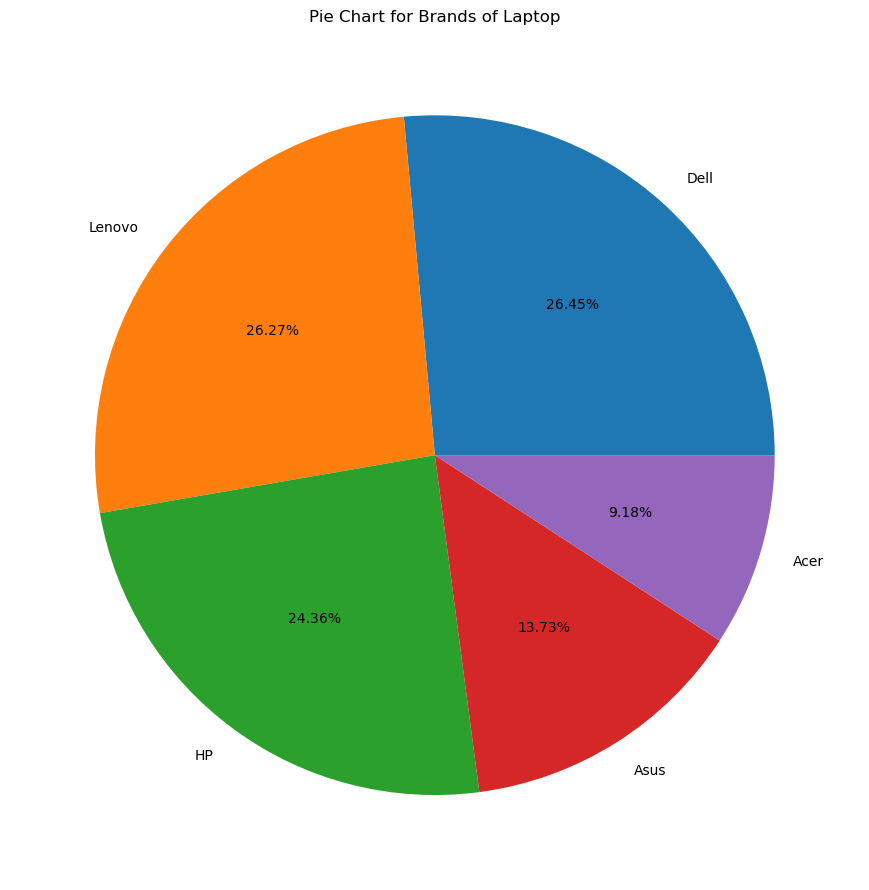

In [18]:
plt.figure(figsize=(12,9))
x = df['Manufacturer'].value_counts()[:5]
plt.pie(x.values,labels=x.index,autopct='%.2f%%')
plt.title(f'Pie Chart for Brands of Laptop')
plt.tight_layout()
plt.show()

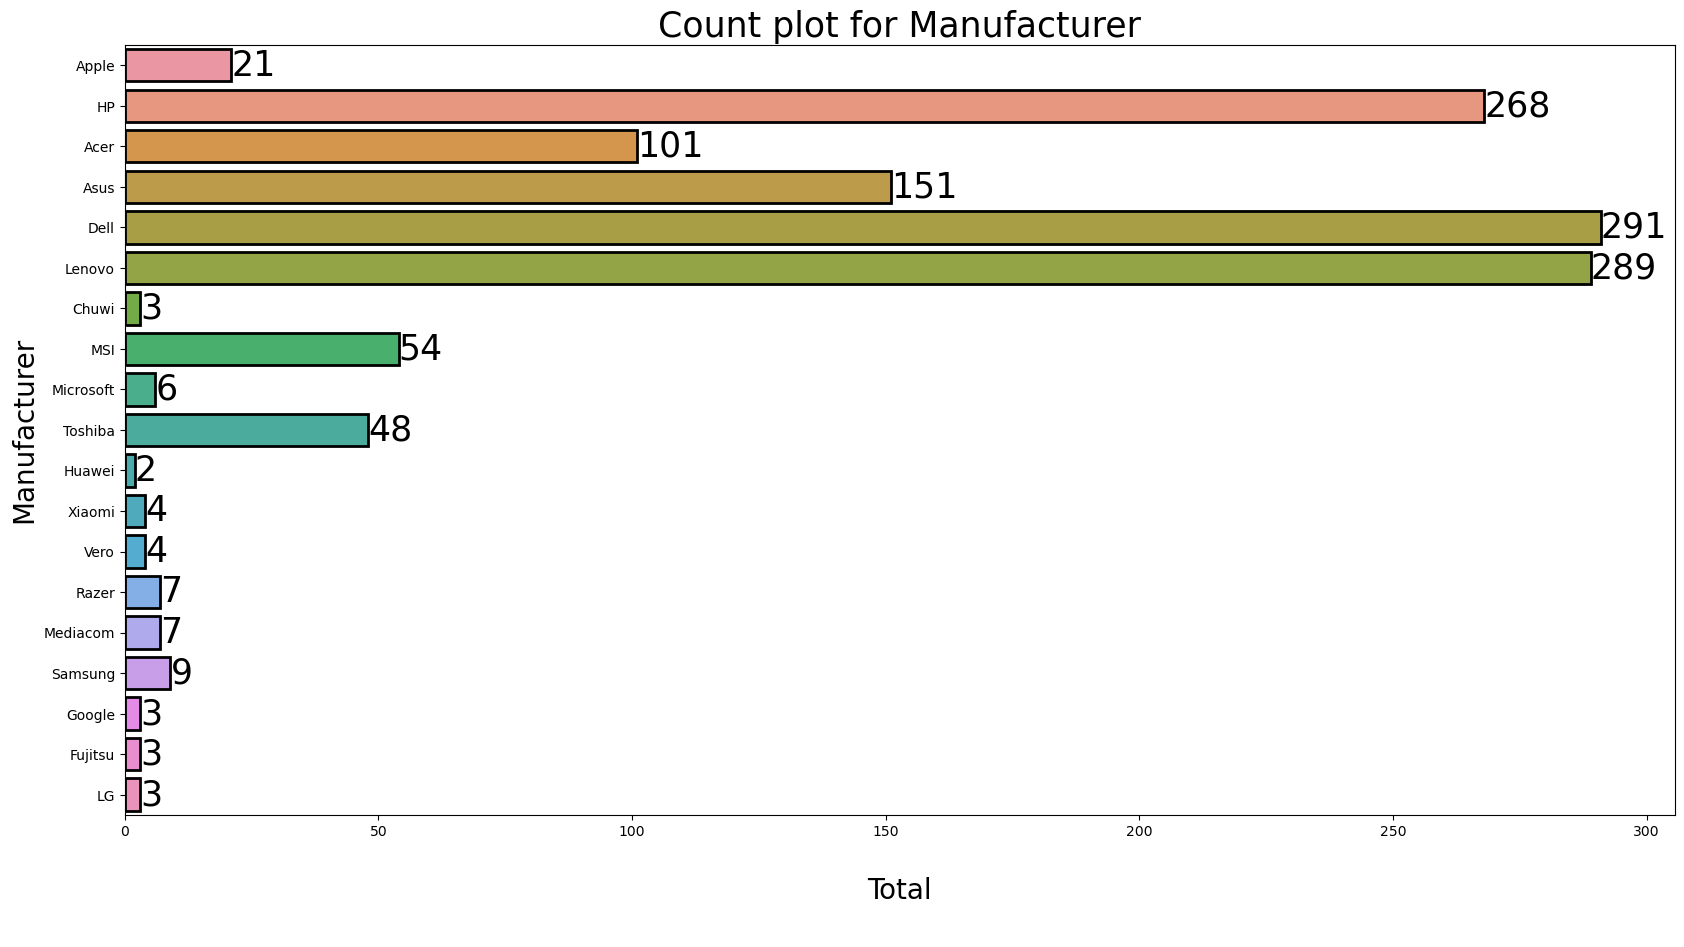

In [19]:
plt.figure(figsize=(20,10))
a = sns.countplot(y=df['Manufacturer'],edgecolor = 'black', linewidth = 2)
a.bar_label(a.containers[0], label_type= 'edge',fontsize=25)
plt.title(f'Count plot for Manufacturer',fontsize=25)
plt.ylabel("Manufacturer",fontsize=20)
plt.xlabel("\nTotal\n",fontsize=20)
plt.show()

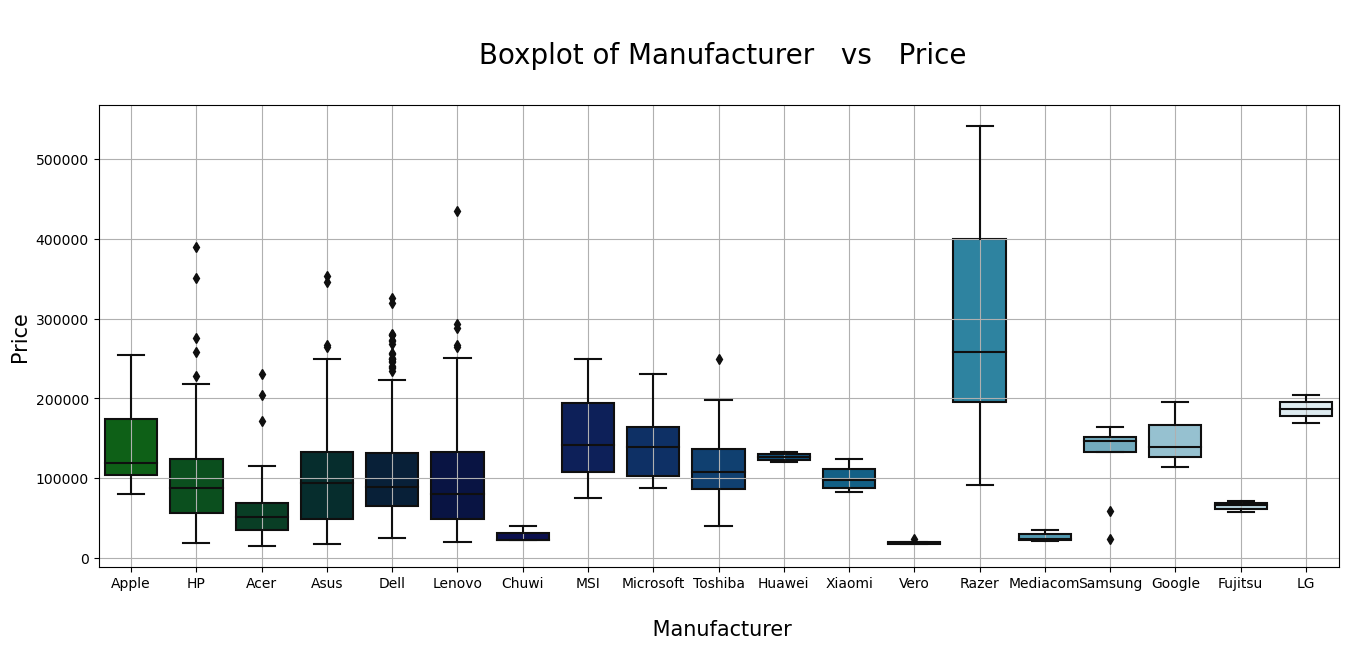

In [20]:
plt.subplots(figsize = (16, 6))

sns.boxplot(x = df['Manufacturer'], y = df['Price'], palette = 'ocean')

plt.title("\n Boxplot of Manufacturer   vs   Price\n",fontsize=20)
plt.xlabel("\n Manufacturer",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.grid()
plt.show()

### INFERENCES

1) Razer manfacturer has highest price compared to other brands

## Model Name

In [21]:
df.rename(columns = {'Model Name':'Model_Name'},inplace=True)

In [22]:
df['Model_Name'].value_counts().index

Index(['XPS 13', 'Inspiron 3567', '250 G6', 'Vostro 3568',
       'Legion Y520-15IKBN', 'Inspiron 5570', 'ProBook 450', 'Alienware 17',
       'Inspiron 5567', 'Satellite Pro',
       ...
       'Aspire A515-51G-59QF', 'ZenBook UX510UX-CN211T', 'Chromebook N23',
       'IdeaPad 320-14IAP', '15-BS026nv (i5-7200U/8GB/256GB/Radeon',
       'VivoBook E201NA', 'Ideapad 520-15IKBR', 'Thinkpad X260',
       'Rog G752VL-UH71T', 'X553SA-XX031T (N3050/4GB/500GB/W10)'],
      dtype='object', length=617)

In [23]:
df['Model_Name'].value_counts()

XPS 13                                 30
Inspiron 3567                          25
250 G6                                 21
Vostro 3568                            19
Legion Y520-15IKBN                     19
                                       ..
VivoBook E201NA                         1
Ideapad 520-15IKBR                      1
Thinkpad X260                           1
Rog G752VL-UH71T                        1
X553SA-XX031T (N3050/4GB/500GB/W10)     1
Name: Model_Name, Length: 617, dtype: int64

In [24]:
 a1 = df['Model_Name'].value_counts()[:10]

<Axes: >

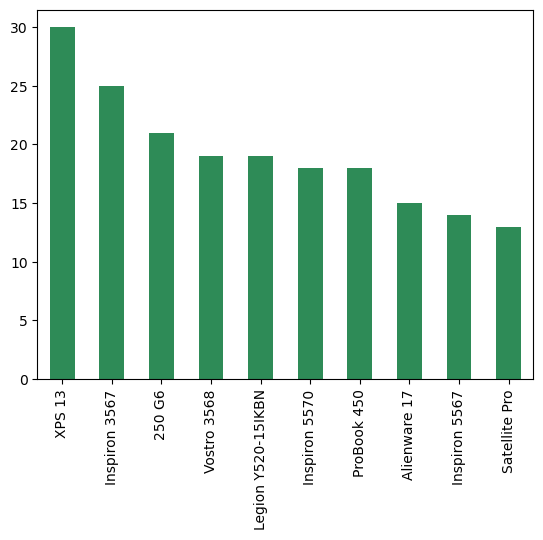

In [25]:
a1.plot(kind='bar',color = 'seagreen')

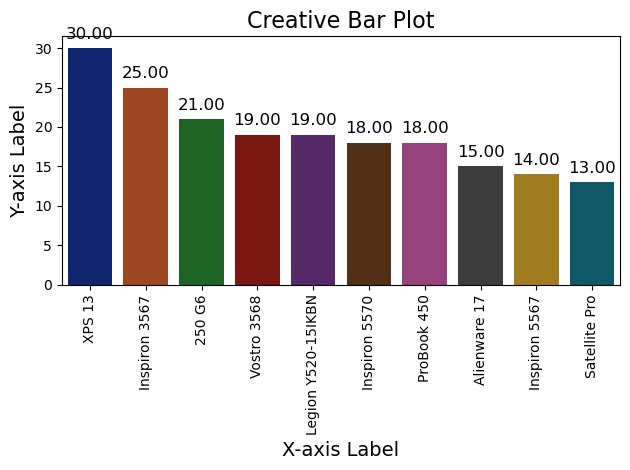

In [26]:
# Create a bar plot with the custom color palette
ax = sns.barplot(x=a1.index, y=a1.values, palette='dark')

# Add title and labels
plt.title("Creative Bar Plot", fontsize=16)
plt.xlabel("X-axis Label", fontsize=14)
plt.ylabel("Y-axis Label", fontsize=14)

# Add value annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.xticks(rotation=90)
# Show the plot
plt.tight_layout()
plt.show()


In [27]:
df.columns

Index(['Manufacturer', 'Model_Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price'],
      dtype='object')

In [28]:
df['Operating System'].value_counts()

Windows      1100
No OS          66
Linux          58
Chrome OS      27
macOS          13
Mac OS          8
Android         2
Name: Operating System, dtype: int64

In [29]:
df['Operating System'] = df['Operating System'].str.replace("macOS","Mac OS")

In [30]:
df.rename(columns = {'Operating System':'Operating_System'},inplace=True)

In [31]:
os = {'No OS':'No_OS','Chrome OS':'Chrome_OS','Mac OS':'Mac_OS'}
df['Operating_System'] = df['Operating_System'].replace(os)

In [32]:
df['Operating_System'].value_counts()

Windows      1100
No_OS          66
Linux          58
Chrome_OS      27
Mac_OS         21
Android         2
Name: Operating_System, dtype: int64

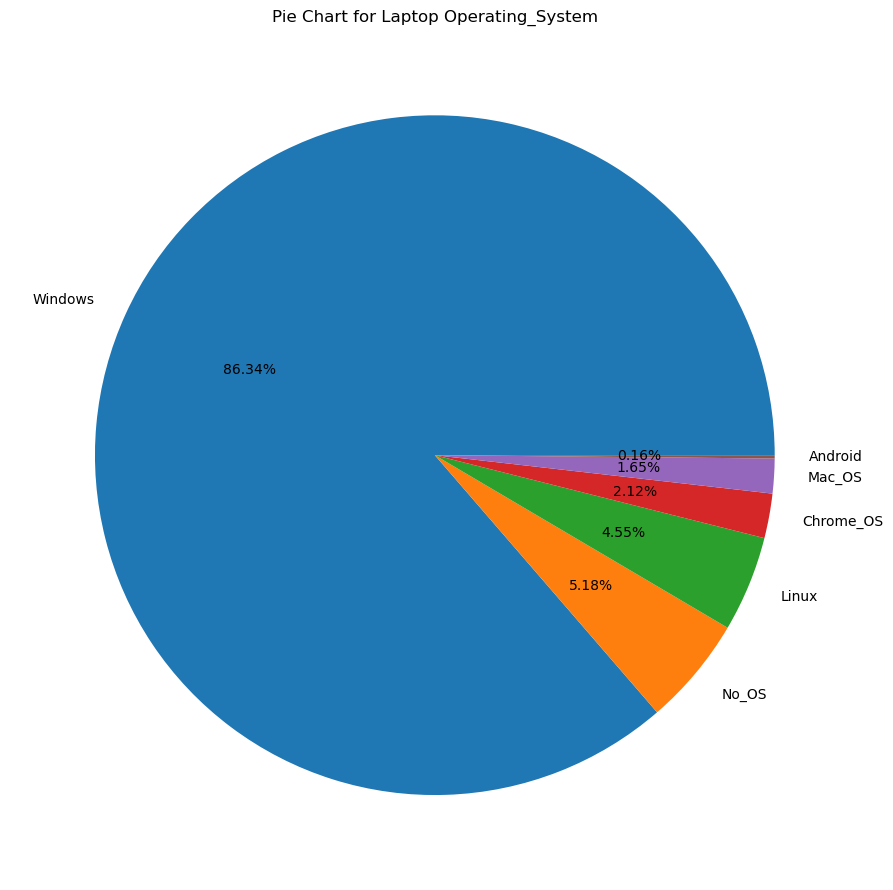

In [33]:
plt.figure(figsize=(12,9))

x = df['Operating_System'].value_counts()
plt.pie(x.values,labels=x.index,autopct='%.2f%%')
plt.title(f'Pie Chart for Laptop Operating_System')
plt.tight_layout()
plt.show()

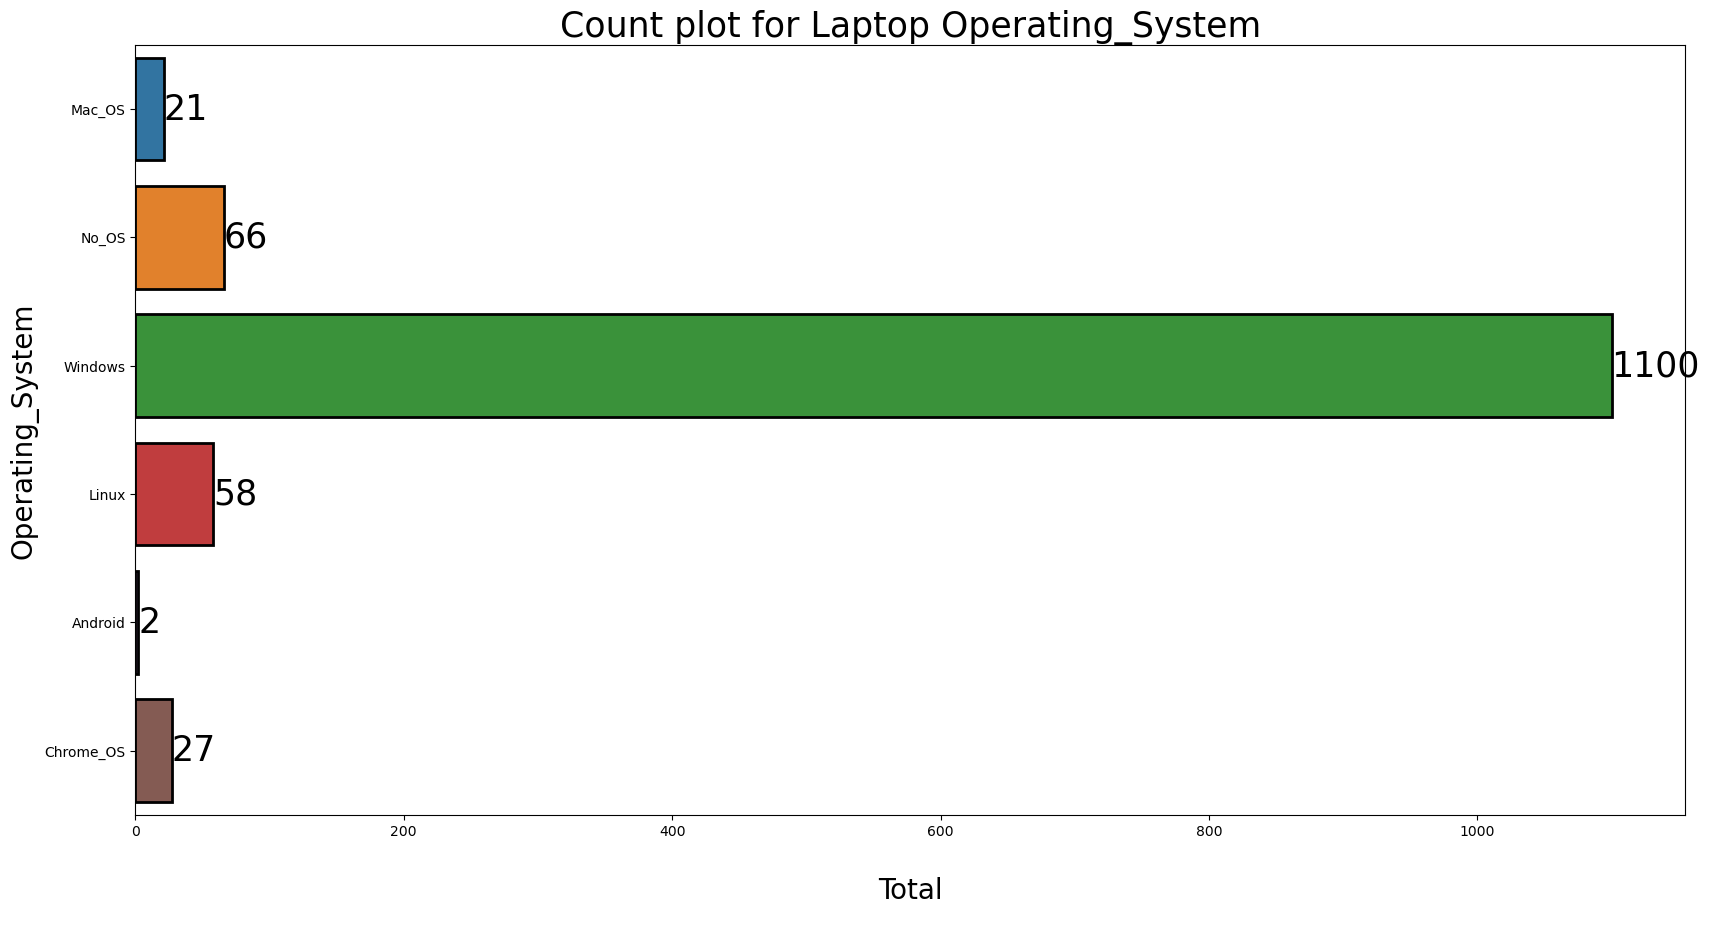

In [34]:
plt.figure(figsize=(20,10))
a = sns.countplot(y=df['Operating_System'],edgecolor = 'black', linewidth = 2)
a.bar_label(a.containers[0], label_type= 'edge',fontsize=25,color='black')
plt.title(f'Count plot for Laptop Operating_System',fontsize=25)
plt.ylabel("Operating_System",fontsize=20)
plt.xlabel("\nTotal\n",fontsize=20)
plt.show()

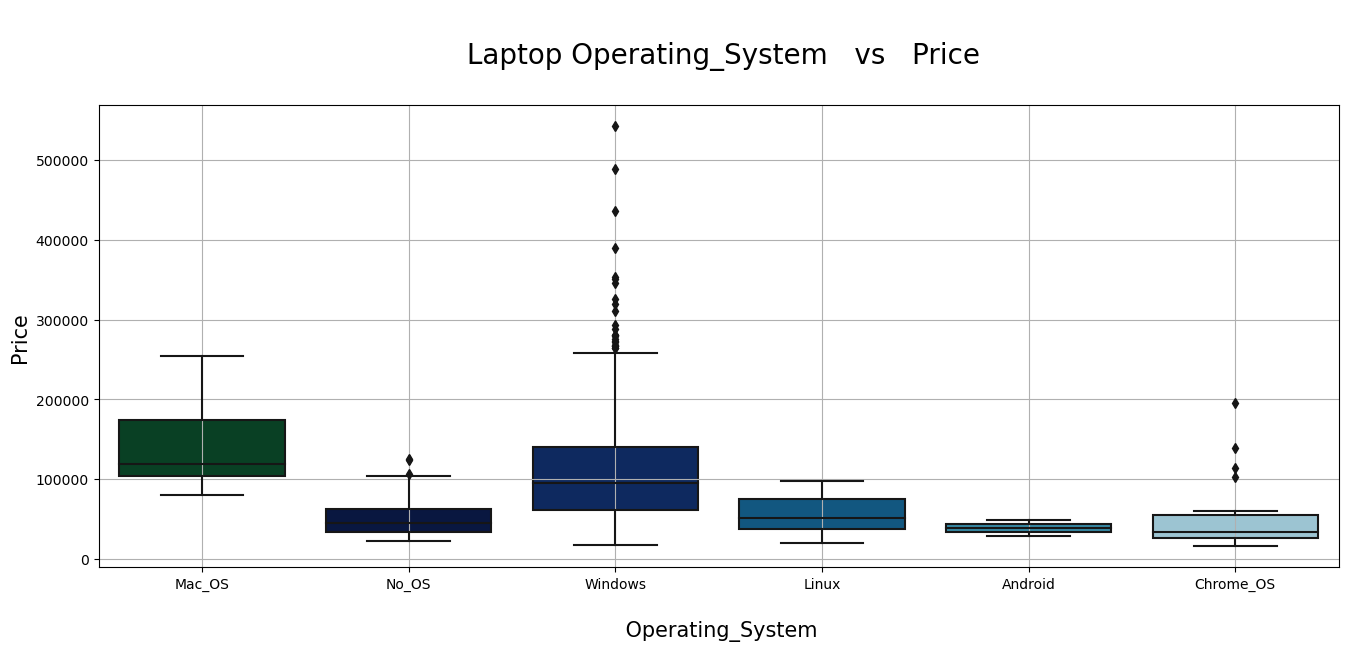

In [35]:
plt.subplots(figsize = (16, 6))

sns.boxplot(x = df['Operating_System'], y = df['Price'], palette = 'ocean')

plt.title("\n Laptop Operating_System   vs   Price\n",fontsize=20)
plt.xlabel("\n Operating_System",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.grid()
plt.show()

## Operating System Version

In [36]:
df.rename(columns = {'Operating System Version':'Operating_System_Version'},inplace=True)

In [37]:
df['Operating_System_Version'].unique()

array([nan, '10', 'X', '10 S', '7'], dtype=object)

In [38]:
df['Operating_System_Version'].value_counts()

10      1047
7         45
X          8
10 S       8
Name: Operating_System_Version, dtype: int64

In [39]:
df['Operating_System_Version'] = df['Operating_System_Version'].fillna('others')

In [40]:
df['Operating_System_Version'].value_counts()

10        1047
others     166
7           45
X            8
10 S         8
Name: Operating_System_Version, dtype: int64

In [41]:
osv = {'10 S':'ten_S','7':'Seven','X':'ten','10':'ten'}

In [42]:
df['Operating_System_Version'] = df['Operating_System_Version'].replace(osv)

In [43]:
df['Operating_System_Version'].value_counts()

ten       1055
others     166
Seven       45
ten_S        8
Name: Operating_System_Version, dtype: int64

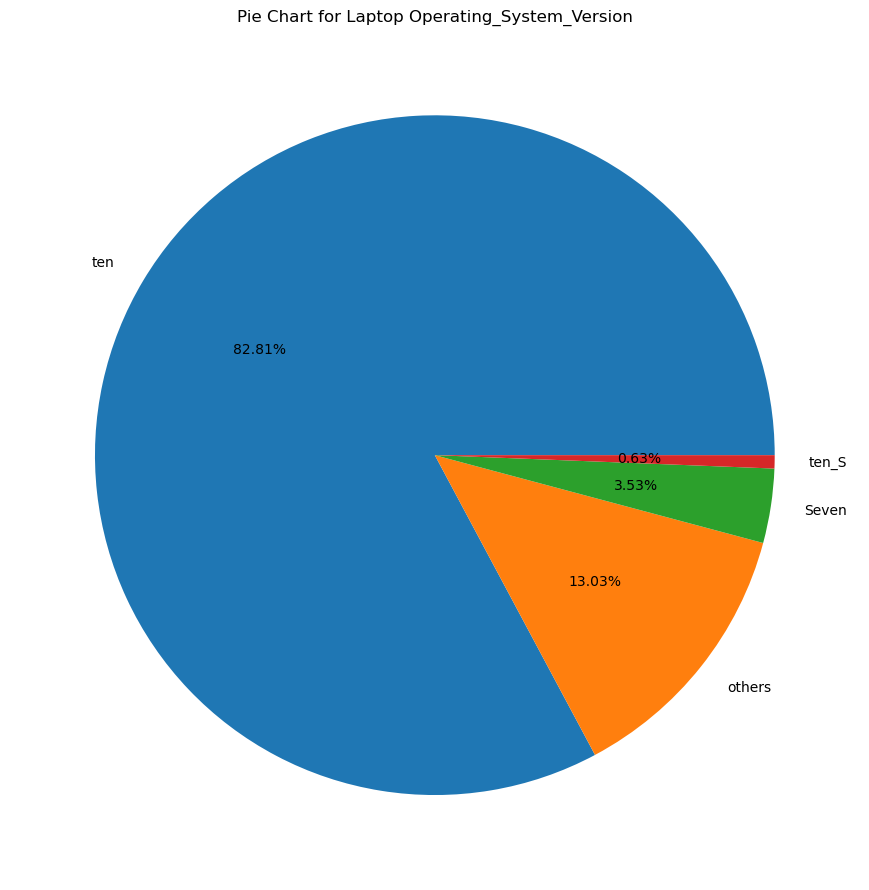

In [44]:
plt.figure(figsize=(12,9))

x = df['Operating_System_Version'].value_counts()
plt.pie(x.values,labels=x.index,autopct='%.2f%%')
plt.title(f'Pie Chart for Laptop Operating_System_Version')
plt.tight_layout()
plt.show()

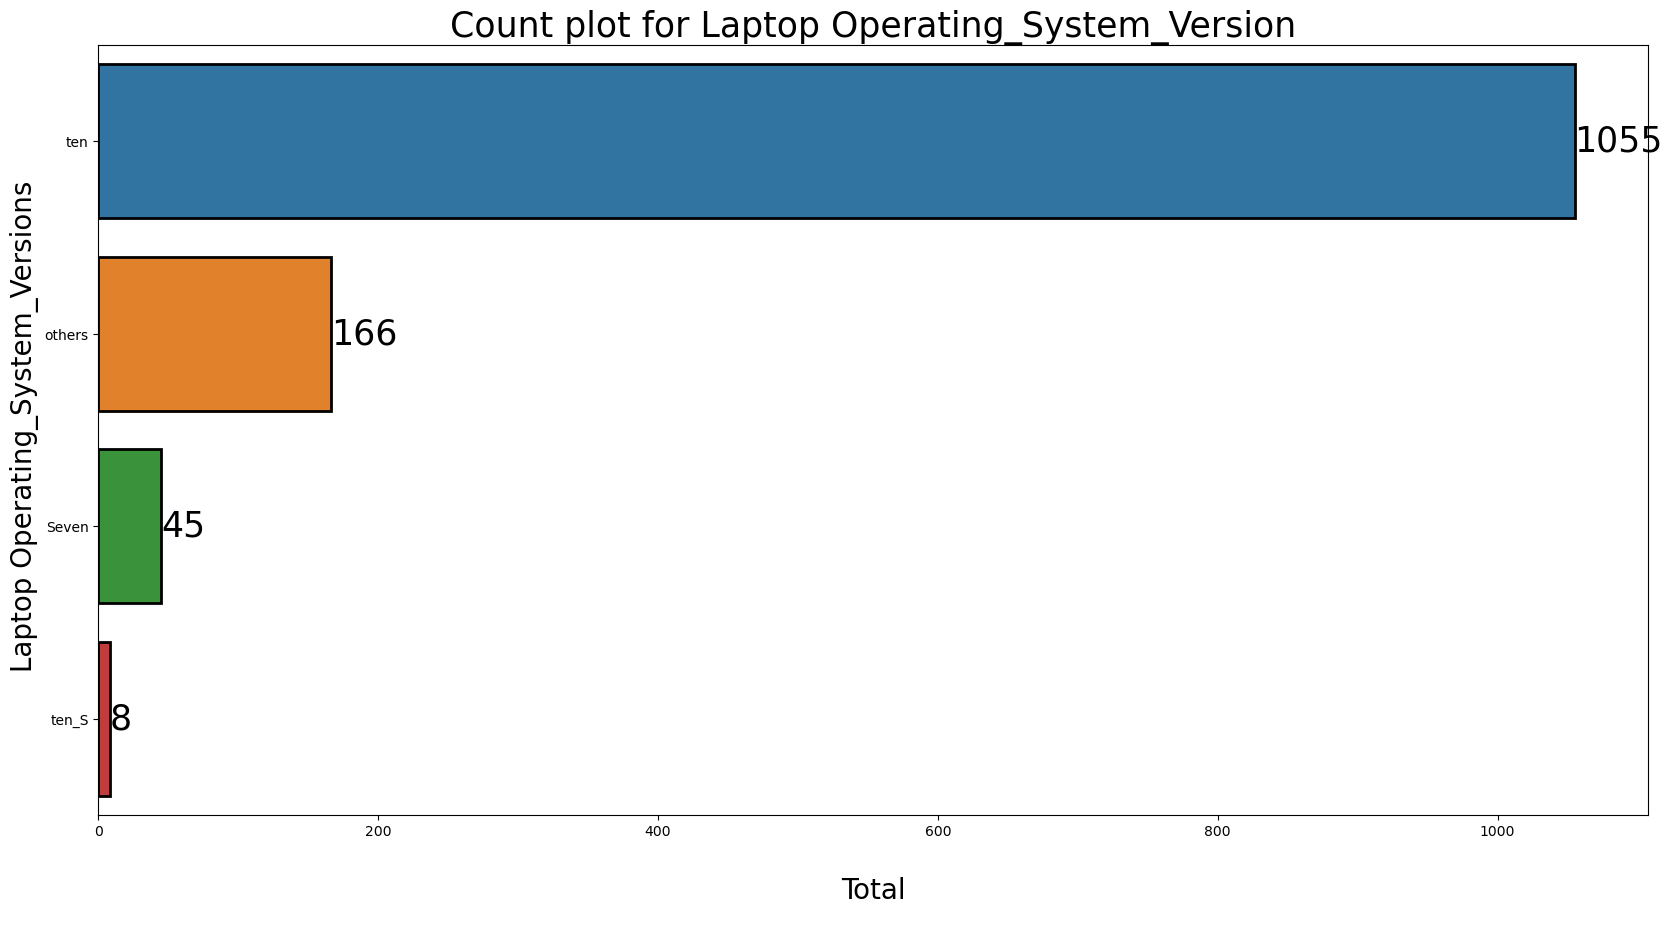

In [45]:
plt.figure(figsize=(20,10))
a = sns.countplot(y=df['Operating_System_Version'],order=df['Operating_System_Version'].value_counts().index,
                  edgecolor = 'black', linewidth = 2)
a.bar_label(a.containers[0], label_type= 'edge',fontsize=25,color='black')
plt.title(f'Count plot for Laptop Operating_System_Version',fontsize=25)
plt.ylabel(" Laptop Operating_System_Versions",fontsize=20)
plt.xlabel("\nTotal\n",fontsize=20)
plt.show()

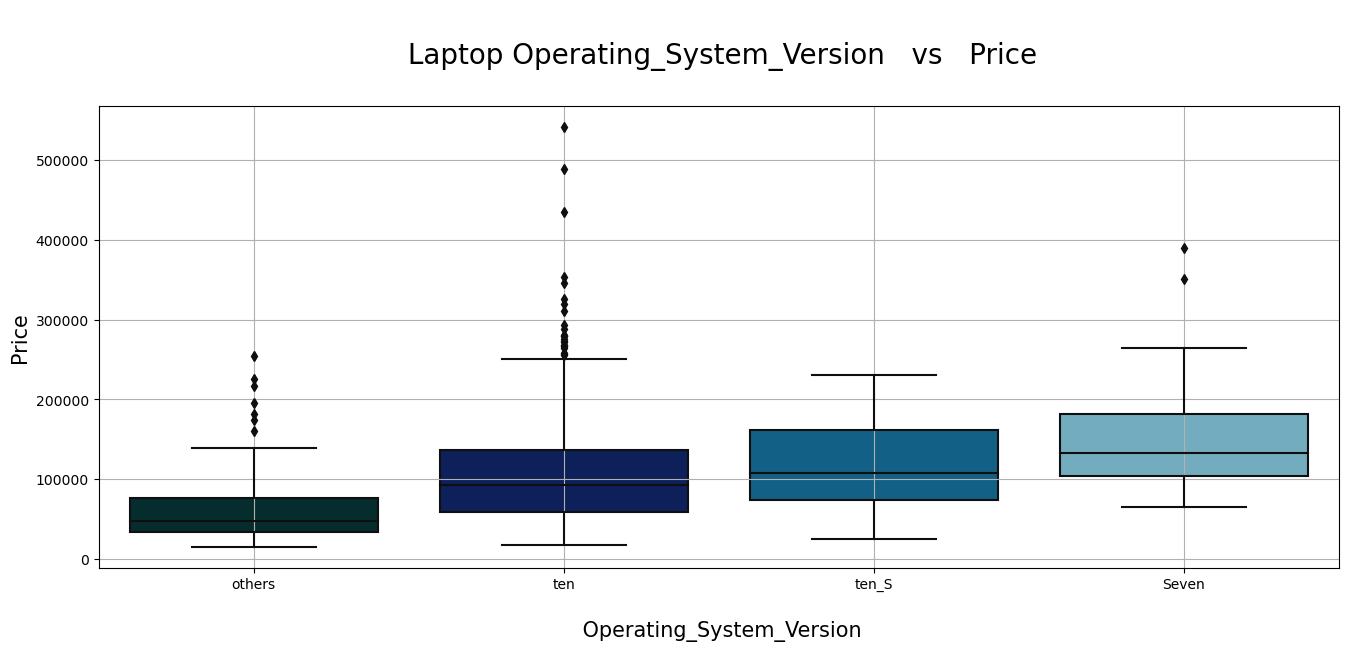

In [46]:
plt.subplots(figsize = (16, 6))

sns.boxplot(x = df['Operating_System_Version'], y = df['Price'], palette = 'ocean')

plt.title("\n Laptop Operating_System_Version   vs   Price\n",fontsize=20)
plt.xlabel("\n Operating_System_Version",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.grid()
plt.show()

### Inference
1) Operating System with Windows 7 have highest price.

## Category

In [47]:
df['Category'].value_counts()

Notebook              707
Gaming                205
Ultrabook             194
2 in 1 Convertible    116
Workstation            29
Netbook                23
Name: Category, dtype: int64

In [48]:
df['Category'] = df['Category'].replace('2 in 1 Convertible','two_in_one_Convertible')

In [49]:
df['Category'].value_counts()

Notebook                  707
Gaming                    205
Ultrabook                 194
two_in_one_Convertible    116
Workstation                29
Netbook                    23
Name: Category, dtype: int64

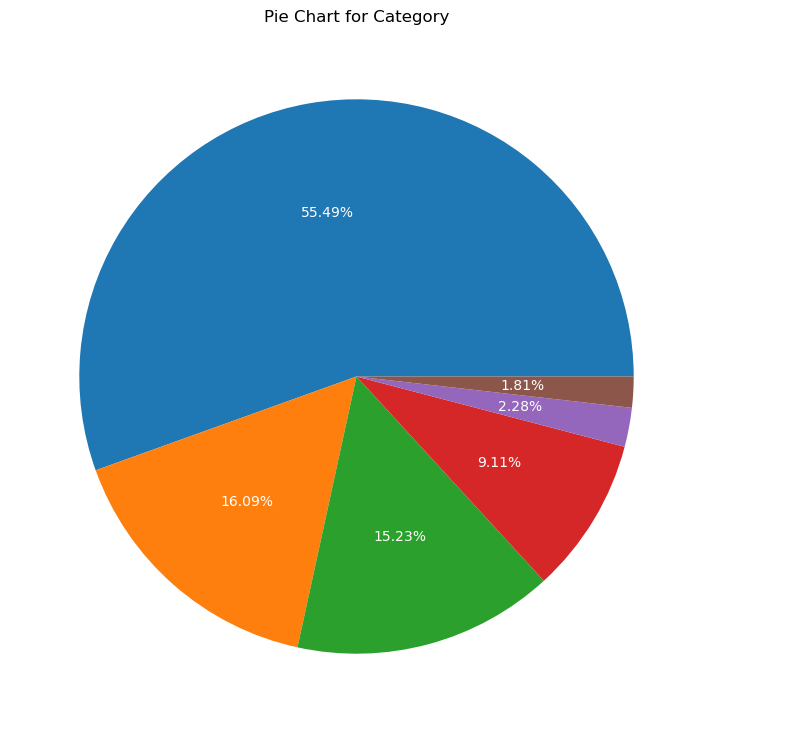

In [50]:
plt.figure(figsize=(12,9))

x = df['Category'].value_counts()
plt.pie(x.values,labels=x.index,autopct='%.2f%%',textprops = dict(size = 10, color = 'white'))
plt.title(f'Pie Chart for Category')

plt.show()

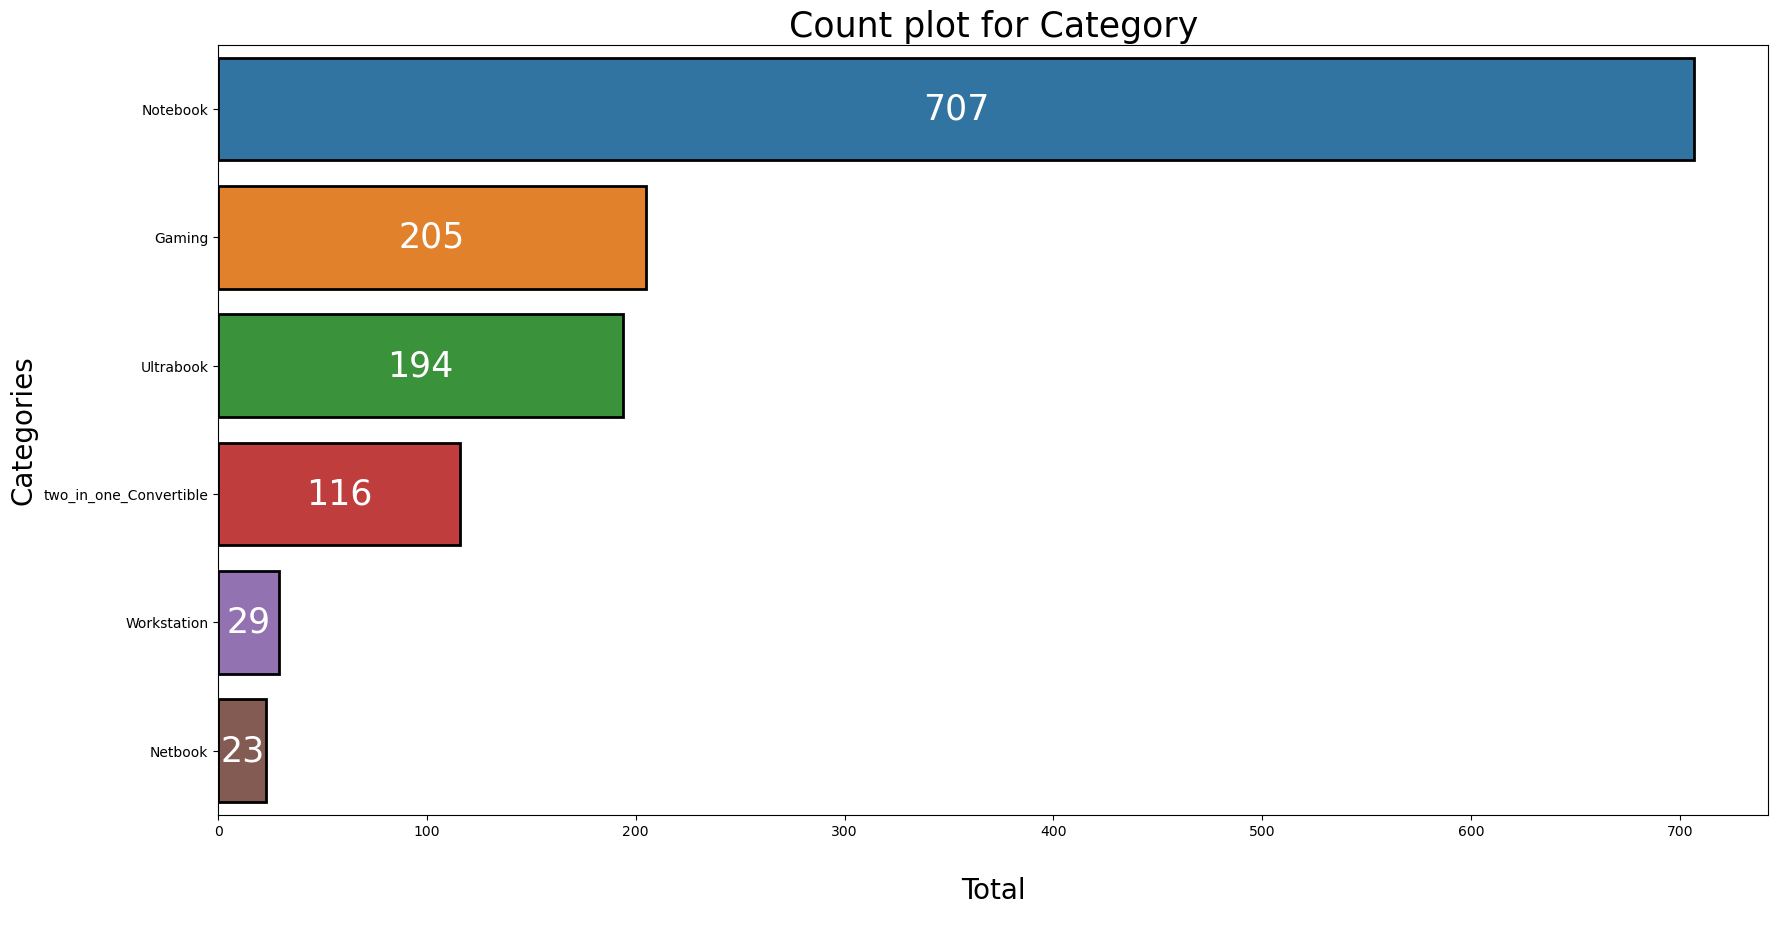

In [51]:
plt.figure(figsize=(20,10))
a = sns.countplot(y=df['Category'],order = df['Category'].value_counts().index,edgecolor = 'black', linewidth = 2)
a.bar_label(a.containers[0], label_type= 'center',fontsize=25,color='white')
plt.title(f'Count plot for Category',fontsize=25)
plt.ylabel("Categories",fontsize=20)
plt.xlabel("\nTotal\n",fontsize=20)
plt.show()

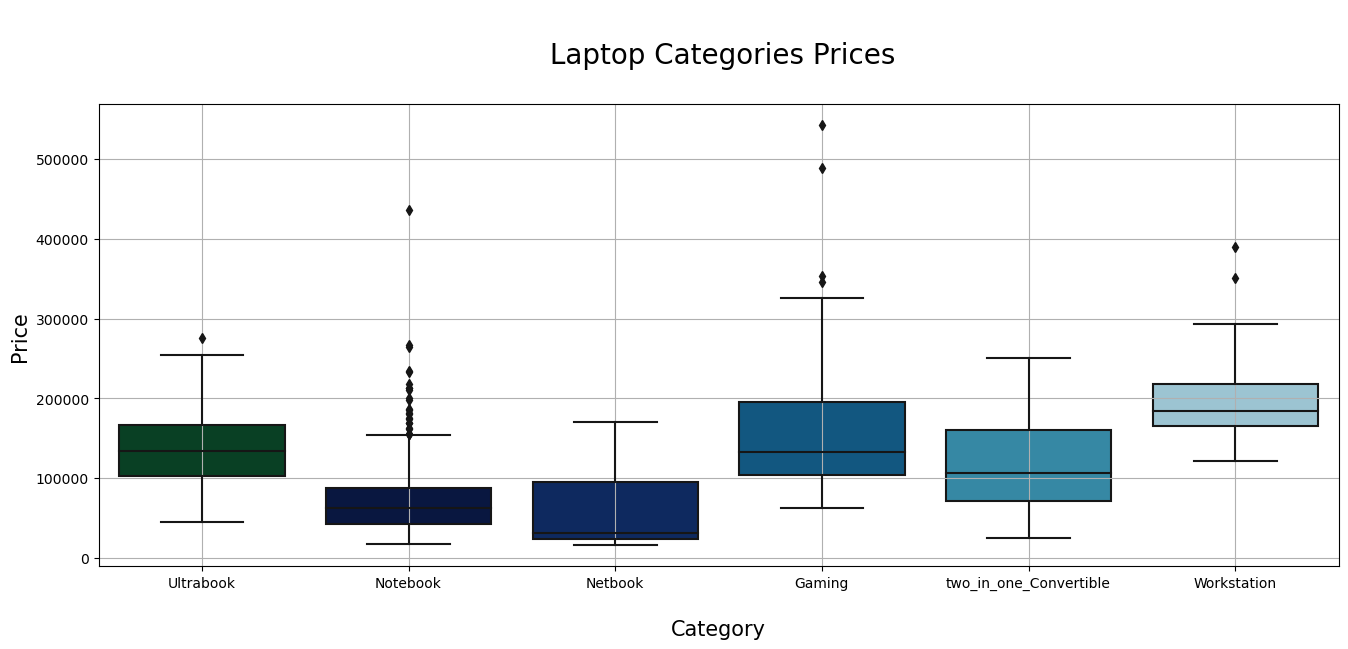

In [52]:
plt.subplots(figsize = (16, 6))

sns.boxplot(x = df['Category'], y = df['Price'], palette = 'ocean')

plt.title("\n Laptop Categories Prices\n",fontsize=20)
plt.xlabel("\nCategory",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.grid()
plt.show()

### inference

1) Workstation Category laptops have comparetively high price compared to netbook category.


## RAM

In [53]:
df['RAM'].value_counts()

8GB     613
4GB     367
16GB    197
6GB      35
12GB     25
32GB     17
2GB      16
24GB      3
64GB      1
Name: RAM, dtype: int64

In [54]:
df['RAM'] = df['RAM'].str.replace('GB','')

In [55]:
df['RAM'].value_counts()

8     613
4     367
16    197
6      35
12     25
32     17
2      16
24      3
64      1
Name: RAM, dtype: int64

In [56]:
df['RAM'] = 'GB_' + df['RAM']

In [57]:
df['RAM'].value_counts()

GB_8     613
GB_4     367
GB_16    197
GB_6      35
GB_12     25
GB_32     17
GB_2      16
GB_24      3
GB_64      1
Name: RAM, dtype: int64

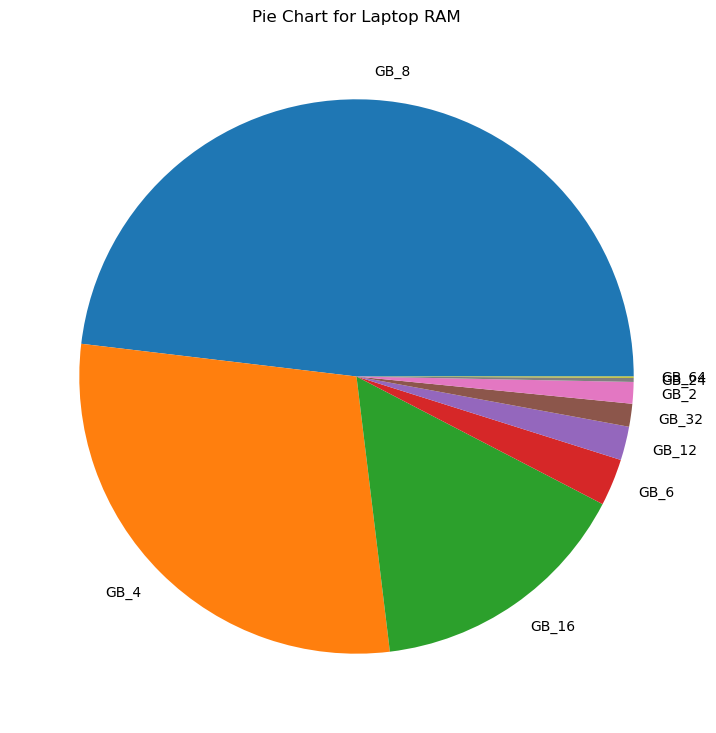

In [58]:
plt.figure(figsize=(12,9))

x = df['RAM'].value_counts()
plt.pie(x.values,labels=x.index)
plt.title(f'Pie Chart for Laptop RAM')

plt.show()

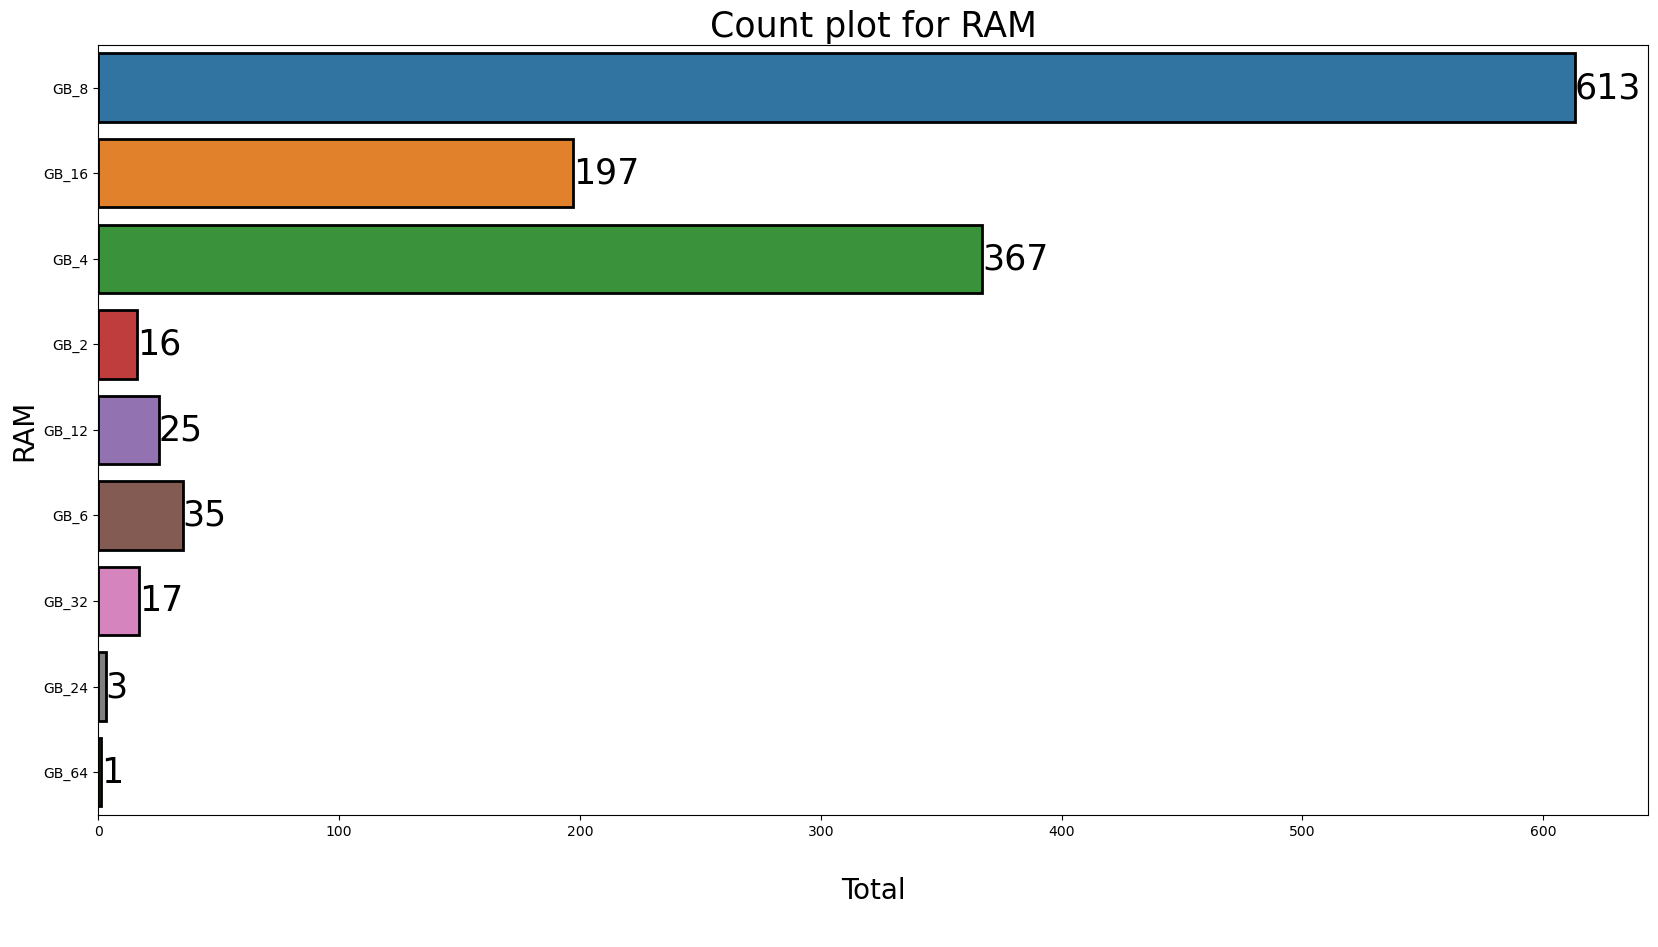

In [59]:
plt.figure(figsize=(20,10), )
a = sns.countplot(y=df['RAM'],edgecolor = 'black', linewidth = 2)
a.bar_label(a.containers[0], label_type= 'edge',fontsize=25,color='Black')
plt.title(f'Count plot for RAM',fontsize=25)
plt.ylabel("RAM",fontsize=20)
plt.xlabel("\nTotal\n",fontsize=20)
plt.show()

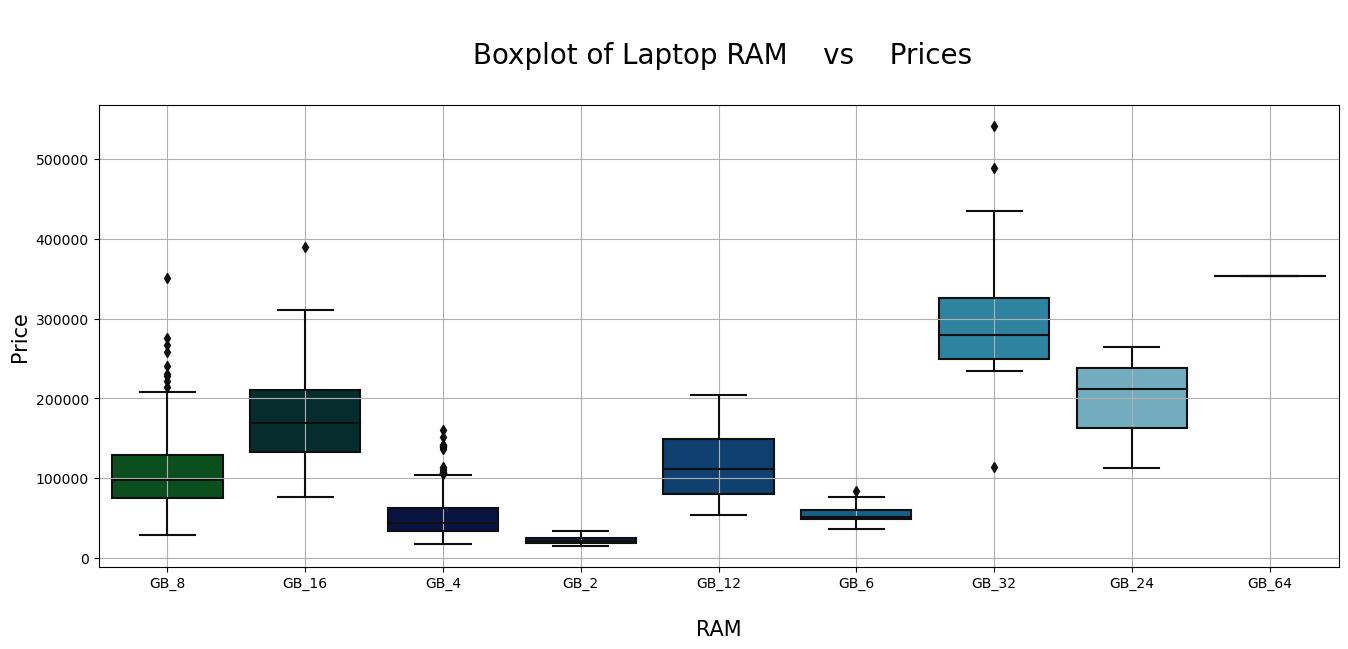

In [60]:
plt.subplots(figsize = (16, 6))

sns.boxplot(x = df['RAM'], y = df['Price'], palette = 'ocean')

plt.title("\n Boxplot of Laptop RAM    vs    Prices\n",fontsize=20)
plt.xlabel("\nRAM",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.grid()
plt.show()

### Inference

1) Higher the RAM higher the price

## CPU and GPU Feature Engineering

In [61]:
df['CPU'].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     131
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: CPU, Length: 118, dtype: int64

In [62]:
df['CPU'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

a = []
for i in df['CPU']:
    b = i.split()

In [63]:
df['GPU'].value_counts()

Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: GPU, Length: 110, dtype: int64

In [64]:
df['CPU_Model'] = df['CPU'].str.split(' ').str[0]

In [65]:
df['GPU_Model'] = df['GPU'].str.split(' ').str[0]

In [66]:
df['CPU_speed_GHz'] = df['CPU'].str.split(' ').str[-1]
df['CPU_speed_GHz'] = df['CPU_speed_GHz'].str.replace('GHz', '').astype(np.float64)

In [67]:
df['CPU_speed_GHz'].value_counts()

2.50    285
2.80    165
2.70    163
1.60    124
2.30     86
2.00     86
1.80     78
2.60     74
1.10     53
2.40     50
2.90     19
3.00     19
1.20     15
1.44     12
2.20     11
1.50     10
1.30      6
3.60      5
3.10      3
2.10      3
1.90      2
0.90      2
3.20      1
1.00      1
1.92      1
Name: CPU_speed_GHz, dtype: int64

In [68]:
BINS_cpu = [0,0.99,1.49,1.99,2.49,2.99,3.49,3.99,4.49]
df['CPU_speed_GHz_Bins'] = pd.cut(df['CPU_speed_GHz'],bins=BINS_cpu, labels = ['ghz_0_to_0_99','ghz_1_to_1_49','ghz_1_50_to_1_99',
                                                                           'ghz_2_to_2_49','ghz_2_50_to_2_99',
               'ghz_3_to_3_49','ghz_3_50_to_3_99','ghz_4_to_4_49'])

In [69]:
df.head()

,Manufacturer,Model_Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating_System,Operating_System_Version,Weight,Price,CPU_Model,GPU_Model,CPU_speed_GHz,CPU_speed_GHz_Bins
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,GB_8,128GB SSD,Intel Iris Plus Graphics 640,Mac_OS,others,1.37kg,119125.2348,Intel,Intel,2.3,ghz_2_to_2_49
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,GB_8,128GB Flash Storage,Intel HD Graphics 6000,Mac_OS,others,1.34kg,79933.7448,Intel,Intel,1.8,ghz_1_50_to_1_99
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,GB_8,256GB SSD,Intel HD Graphics 620,No_OS,others,1.86kg,51129.0000,Intel,Intel,2.5,ghz_2_50_to_2_99
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,GB_16,512GB SSD,AMD Radeon Pro 455,Mac_OS,others,1.83kg,225630.0540,Intel,AMD,2.7,ghz_2_50_to_2_99
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,GB_8,256GB SSD,Intel Iris Plus Graphics 650,Mac_OS,others,1.37kg,160376.1120,Intel,Intel,3.1,ghz_3_to_3_49


In [70]:
df['CPU_Model'].value_counts()

Intel      1213
AMD          60
Samsung       1
Name: CPU_Model, dtype: int64

In [71]:
df['CPU_speed_GHz_Bins'].value_counts()

ghz_2_50_to_2_99    706
ghz_2_to_2_49       236
ghz_1_50_to_1_99    215
ghz_1_to_1_49        87
ghz_3_to_3_49        23
ghz_3_50_to_3_99      5
ghz_0_to_0_99         2
ghz_4_to_4_49         0
Name: CPU_speed_GHz_Bins, dtype: int64

df['Processor'] = df['CPU'].str.split(" ").str[1:3]

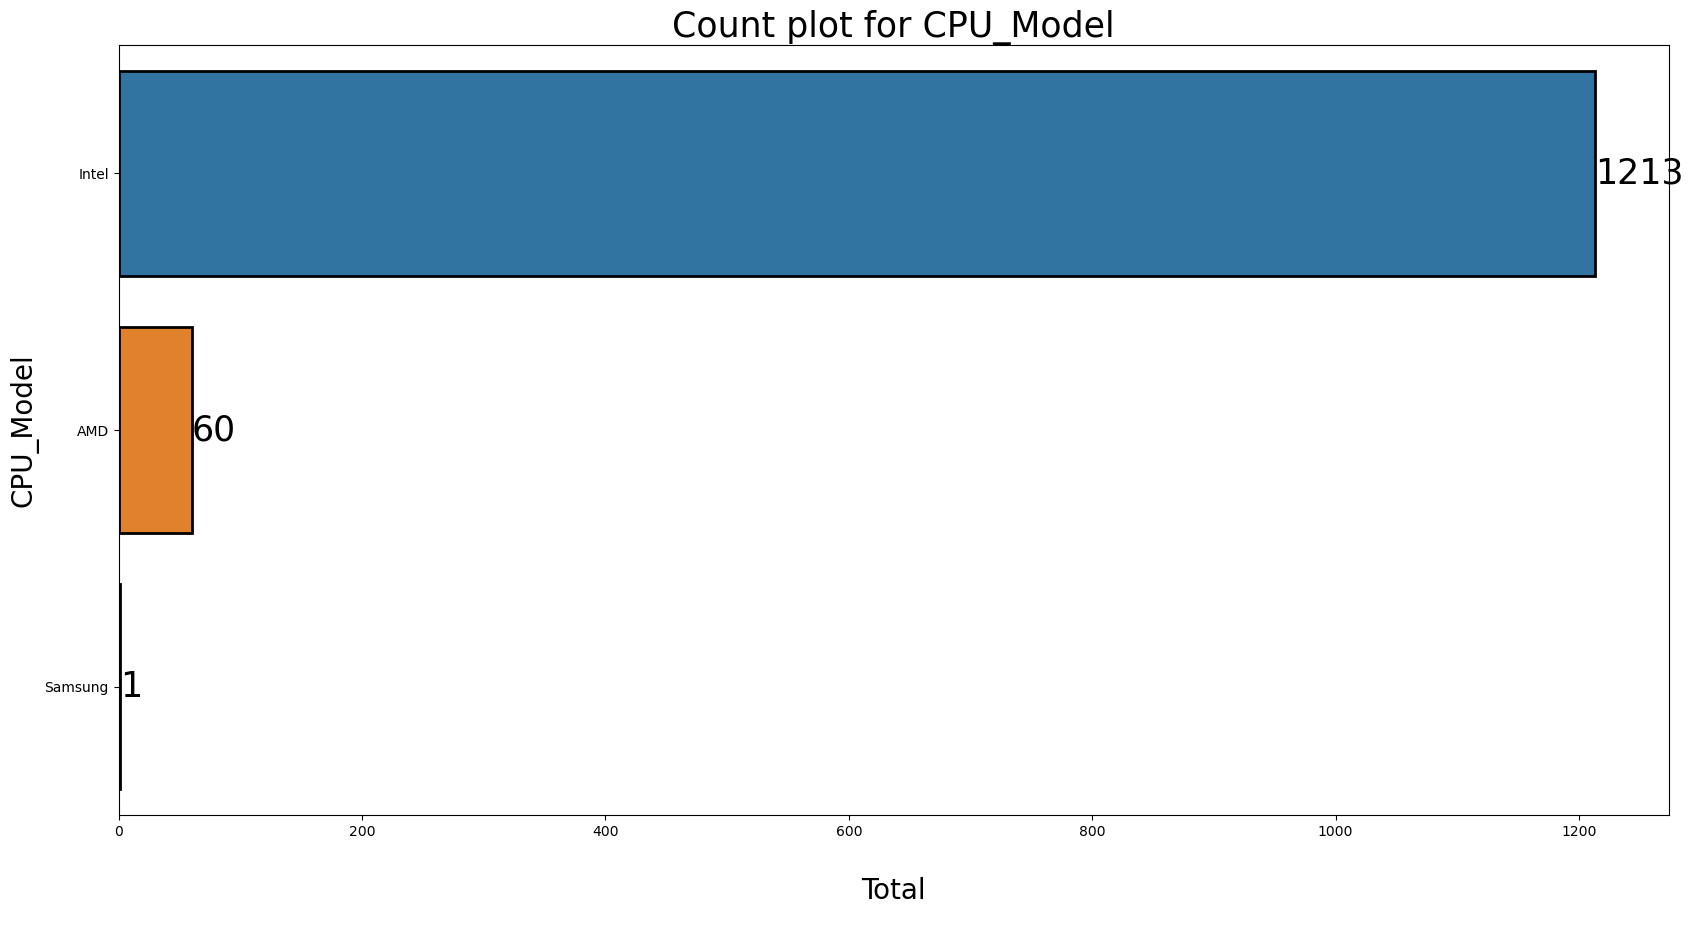

In [72]:
plt.figure(figsize=(20,10))
a = sns.countplot(y=df['CPU_Model'],edgecolor = 'black', linewidth = 2)
a.bar_label(a.containers[0], label_type= 'edge',fontsize=25,color='Black')
plt.title(f'Count plot for CPU_Model',fontsize=25)
plt.ylabel("CPU_Model",fontsize=20)
plt.xlabel("\nTotal\n",fontsize=20)  
plt.show()

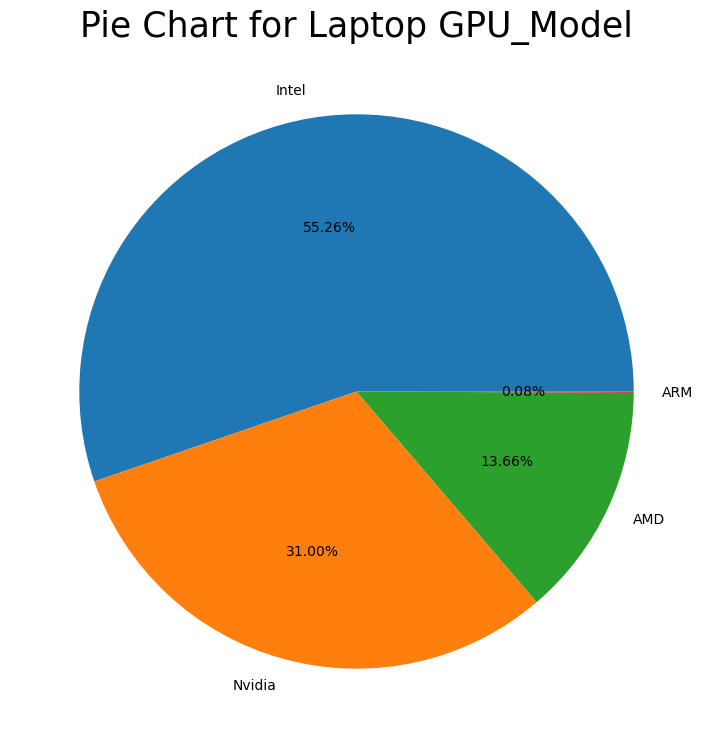

In [73]:
plt.figure(figsize=(12,9))

x = df['GPU_Model'].value_counts()
plt.pie(x.values,labels=x.index,autopct='%.2f%%')
plt.title(f'Pie Chart for Laptop GPU_Model',fontsize=25)

plt.show()

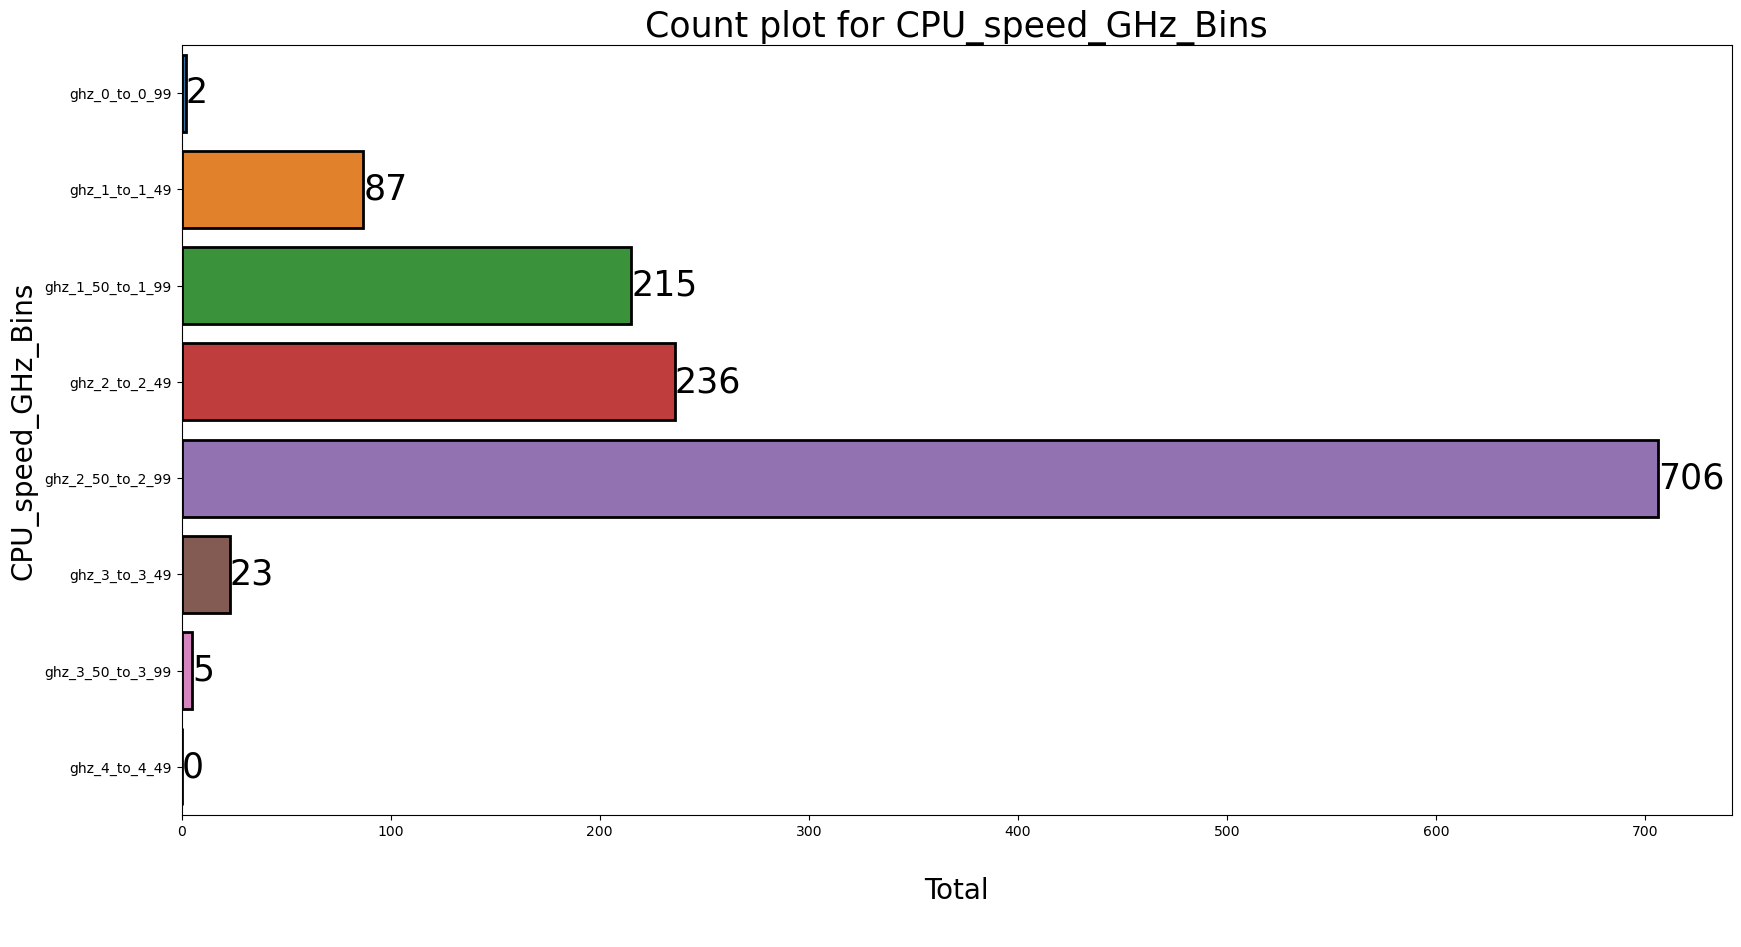

In [74]:
plt.figure(figsize=(20,10))
a = sns.countplot(y=df['CPU_speed_GHz_Bins'],edgecolor = 'black', linewidth = 2)
a.bar_label(a.containers[0], label_type= 'edge',fontsize=25,color='Black')
plt.title(f'Count plot for CPU_speed_GHz_Bins',fontsize=25)
plt.ylabel("CPU_speed_GHz_Bins",fontsize=20)
plt.xlabel("\nTotal\n",fontsize=20)
plt.show()

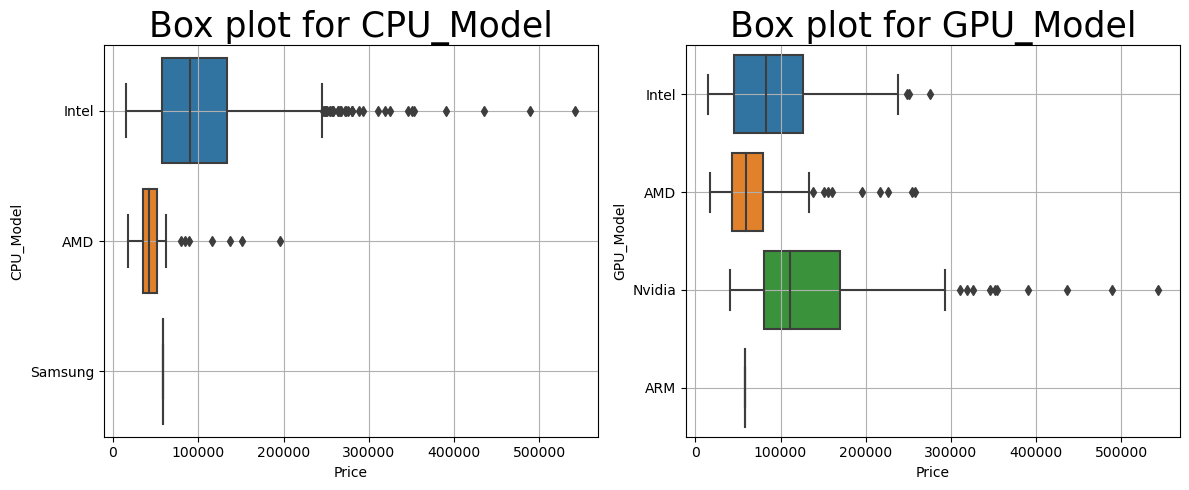

In [75]:
boxplot_col = ['CPU_Model','GPU_Model']

plt.figure(figsize=(12,5))
for i in range(0,len(boxplot_col)):
    plt.subplot(1,2,i+1)
    sns.boxplot(y=df[boxplot_col[i]],x=df['Price'])
    plt.title(f'Box plot for {boxplot_col[i]}', fontsize=25)
    plt.grid()
plt.tight_layout()
plt.show()

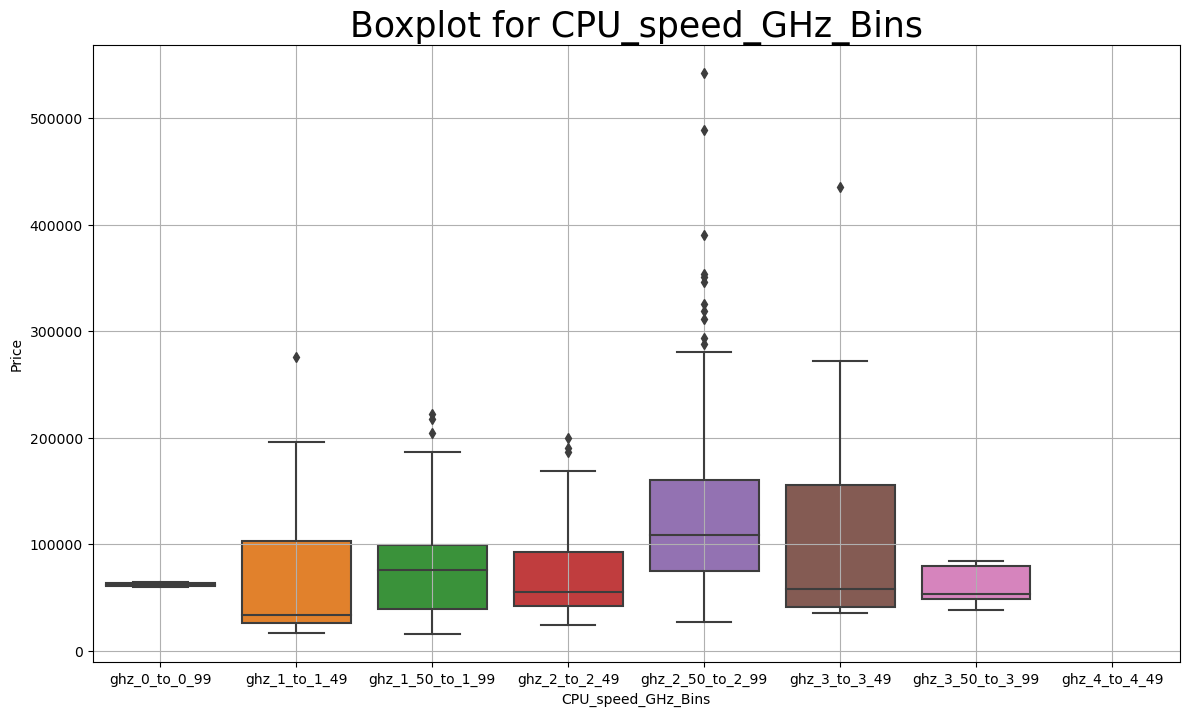

In [76]:
plt.figure(figsize=(12,20))

plt.subplot(3,1,i+1)
sns.boxplot(x=df['CPU_speed_GHz_Bins'],y=df['Price'])
plt.title(f'Boxplot for CPU_speed_GHz_Bins', fontsize=25)
plt.grid()
plt.tight_layout()
plt.show()

### Weight

In [77]:
df['Weight'].value_counts()

2.2kg     117
2.1kg      58
2.4kg      42
2.5kg      38
2.3kg      36
         ... 
1.14kg      1
3.8kg       1
1.19kg      1
1.55kg      1
4.0kg       1
Name: Weight, Length: 179, dtype: int64

In [78]:
df['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [79]:
df['Weight'] = df['Weight'].str.replace("kgs",'')
df['Weight'] = df['Weight'].str.replace("kg",'')
df['Weight'] = df['Weight'].astype('float')
df.rename(columns = {'Weight':'Weight_KG'},inplace=True)

In [80]:
df['Weight_KG'].nunique()

171

In [81]:
BINS_wt = [0,1,2,3,4,5]
df['Weight_Bins'] = pd.cut(df['Weight_KG'],bins=BINS_wt, labels = ['kg_Up_to_1','kg_1_01_to_2','kg_2_01_to_3',
               'kg_3_01_to_4','kg_4_01_to_5'])

In [82]:
df['Weight_Bins'].value_counts()

kg_1_01_to_2    603
kg_2_01_to_3    580
kg_3_01_to_4     40
kg_4_01_to_5     33
kg_Up_to_1       18
Name: Weight_Bins, dtype: int64

In [83]:
df.head()

,Manufacturer,Model_Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating_System,Operating_System_Version,Weight_KG,Price,CPU_Model,GPU_Model,CPU_speed_GHz,CPU_speed_GHz_Bins,Weight_Bins
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,GB_8,128GB SSD,Intel Iris Plus Graphics 640,Mac_OS,others,1.37,119125.2348,Intel,Intel,2.3,ghz_2_to_2_49,kg_1_01_to_2
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,GB_8,128GB Flash Storage,Intel HD Graphics 6000,Mac_OS,others,1.34,79933.7448,Intel,Intel,1.8,ghz_1_50_to_1_99,kg_1_01_to_2
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,GB_8,256GB SSD,Intel HD Graphics 620,No_OS,others,1.86,51129.0000,Intel,Intel,2.5,ghz_2_50_to_2_99,kg_1_01_to_2
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,GB_16,512GB SSD,AMD Radeon Pro 455,Mac_OS,others,1.83,225630.0540,Intel,AMD,2.7,ghz_2_50_to_2_99,kg_1_01_to_2
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,GB_8,256GB SSD,Intel Iris Plus Graphics 650,Mac_OS,others,1.37,160376.1120,Intel,Intel,3.1,ghz_3_to_3_49,kg_1_01_to_2


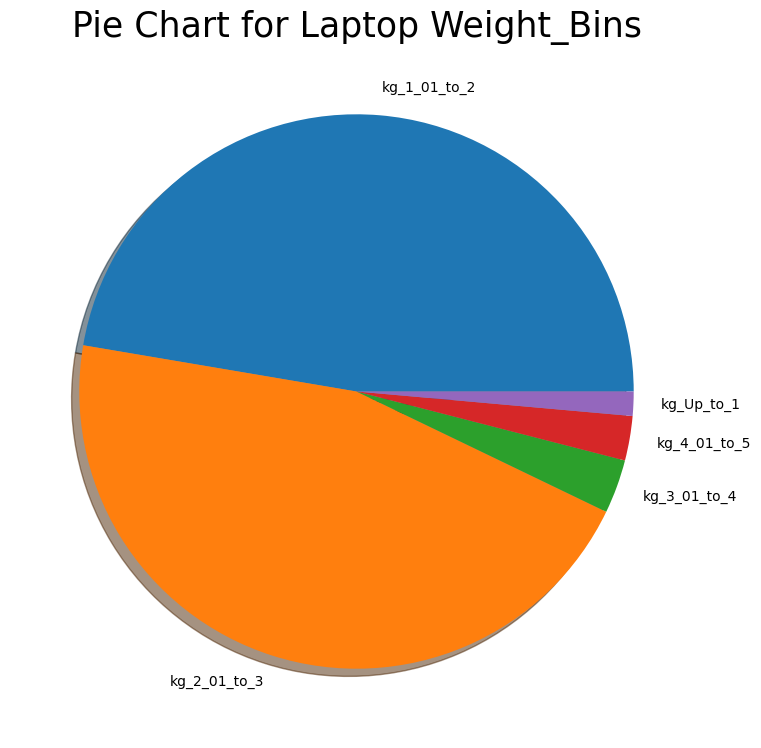

In [84]:
plt.figure(figsize=(12,9))

x = df['Weight_Bins'].value_counts()
plt.pie(x.values,labels=x.index,shadow = True)
plt.title(f'Pie Chart for Laptop Weight_Bins',fontsize=25)

plt.show()

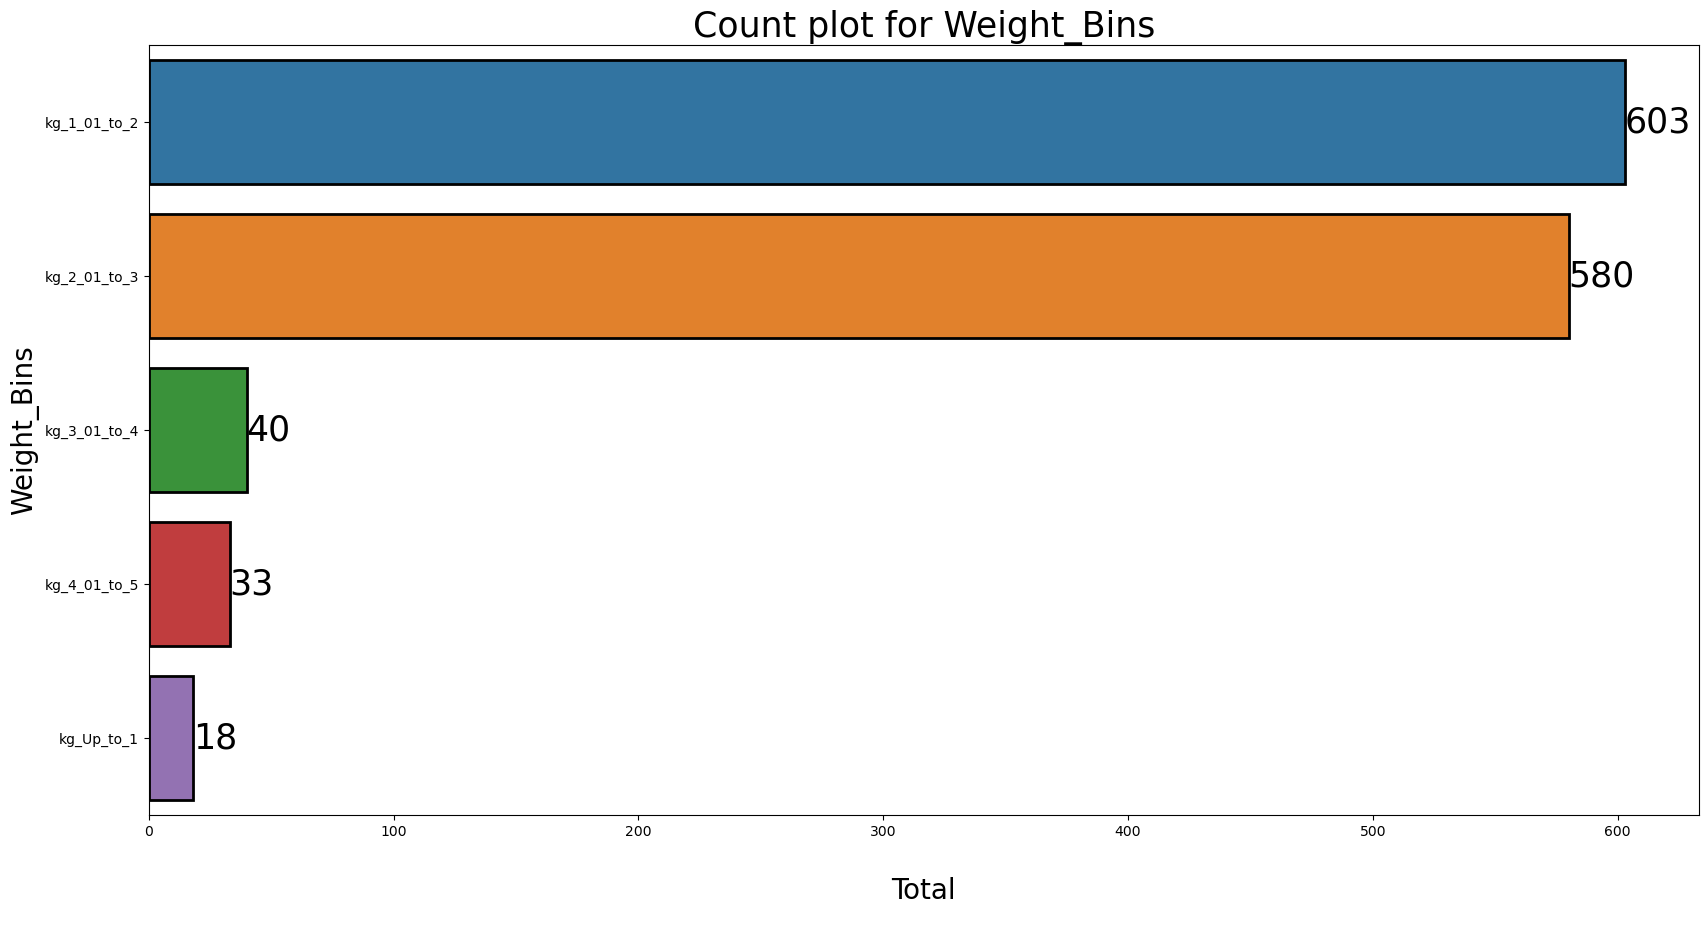

In [85]:
plt.figure(figsize=(20,10))
a = sns.countplot(y=df['Weight_Bins'], order=df['Weight_Bins'].value_counts().index,edgecolor = 'black', linewidth = 2)
a.bar_label(a.containers[0], label_type= 'edge',fontsize=25,color='Black')
plt.title(f'Count plot for Weight_Bins',fontsize=25)
plt.ylabel("Weight_Bins",fontsize=20)
plt.xlabel("\nTotal\n",fontsize=20)
plt.show()

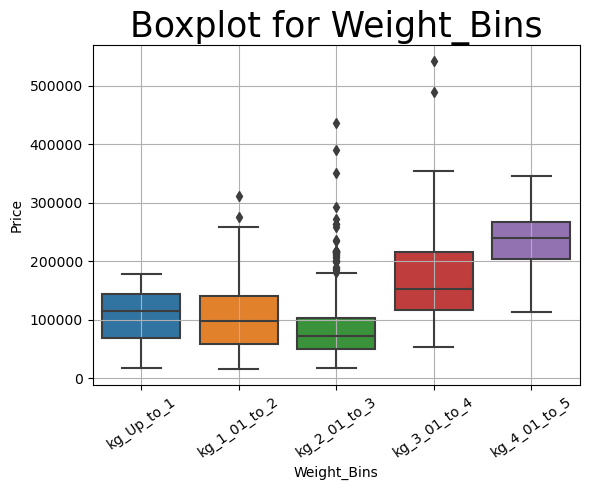

In [86]:
plt.figure(figsize=(6,5))

sns.boxplot(x=df['Weight_Bins'],y=df['Price'])
plt.title(f'Boxplot for Weight_Bins', fontsize=25)
plt.grid()
plt.xticks(rotation = 35)
plt.tight_layout()
plt.show()

### Inference

1). Price is directly proportional to Weight of the laptop.

## Storage

In [87]:
df.rename(columns = {' Storage':'Storage'},inplace=True)

In [88]:
df['Storage'].value_counts()

256GB SSD                        412
1TB HDD                          216
500GB HDD                        124
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1TB Hybrid                         7
32GB SSD                           6
1GB SSD                            5
128GB Flash Storage                4
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
512GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [89]:
df['Storage'] = df['Storage'].str.replace('1GB SSD','1TB SSD')
df['Storage'] = df['Storage'].str.replace('508GB Hybrid','512GB Hybrid')
df['Storage'] = df['Storage'].str.replace('500GB HDD','512GB HDD')

In [90]:
df['Storage'] = df['Storage'].str.replace('1TB','1024GB')
df['Storage'] = df['Storage'].str.replace('2TB','2048GB')

In [91]:
df['Storage'].value_counts()

256GB SSD                           412
1024GB HDD                          216
512GB HDD                           124
512GB SSD                           114
128GB SSD +  1024GB HDD              94
128GB SSD                            74
256GB SSD +  1024GB HDD              73
32GB Flash Storage                   36
1024GB SSD                           19
2048GB HDD                           16
512GB SSD +  1024GB HDD              14
64GB Flash Storage                   13
256GB SSD +  2048GB HDD              10
256GB Flash Storage                   8
16GB Flash Storage                    7
1024GB Hybrid                         7
32GB SSD                              6
128GB Flash Storage                   4
16GB SSD                              3
512GB Flash Storage                   2
1024GB SSD +  1024GB HDD              2
512GB SSD +  2048GB HDD               2
256GB SSD +  256GB SSD                2
128GB SSD +  2048GB HDD               2
256GB SSD +  512GB HDD                2


In [92]:
df1 = df.copy()   

### Storage Feature engineering

In [93]:
df['Secondary_Storage'] = df['Storage'].str.split('+').str[1]
df['Primary_Storage'] = df['Storage'].str.split('+').str[0]

df['Primary_Storage'] = df['Primary_Storage'].str.replace('GB','')
df['Secondary_Storage'] = df['Secondary_Storage'].str.replace('GB','')

In [94]:
df.head(2)

,Manufacturer,Model_Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating_System,Operating_System_Version,Weight_KG,Price,CPU_Model,GPU_Model,CPU_speed_GHz,CPU_speed_GHz_Bins,Weight_Bins,Secondary_Storage,Primary_Storage
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,GB_8,128GB SSD,Intel Iris Plus Graphics 640,Mac_OS,others,1.37,119125.2348,Intel,Intel,2.3,ghz_2_to_2_49,kg_1_01_to_2,NaN,128GB SSD
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,GB_8,128GB Flash Storage,Intel HD Graphics 6000,Mac_OS,others,1.34,79933.7448,Intel,Intel,1.8,ghz_1_50_to_1_99,kg_1_01_to_2,NaN,128GB Flash Storage


In [95]:
df['Primary_Storage_size'] = df['Primary_Storage'].str.split(' ').str[0]
df['Primary_Storage_Type'] = df['Primary_Storage'].str.split(' ').str[1]

In [96]:
df['Primary_Storage_size'].value_counts()

256GB     508
512GB     260
1024GB    245
128GB     175
32GB       43
2048GB     16
64GB       15
16GB       10
240GB       1
8GB         1
Name: Primary_Storage_size, dtype: int64

In [97]:
df['Primary_Storage_size'] = df['Primary_Storage_size'].replace('240GB','256GB')
df['Primary_Storage_size'] = df['Primary_Storage_size'].replace('8GB','1024GB')

In [98]:
df['Primary_Storage_size'] = df['Primary_Storage_size'].str.replace('GB','')

In [99]:
df['Primary_Storage_size'] = 'GB_' + df['Primary_Storage_size']

In [100]:
df['Primary_Storage_size'].value_counts()

GB_256     509
GB_512     260
GB_1024    246
GB_128     175
GB_32       43
GB_2048     16
GB_64       15
GB_16       10
Name: Primary_Storage_size, dtype: int64

In [101]:
df['Primary_Storage_size']

0       GB_128
1       GB_128
2       GB_256
3       GB_512
4       GB_256
        ...   
292     GB_128
293     GB_512
294      GB_64
295    GB_1024
296     GB_512
Name: Primary_Storage_size, Length: 1274, dtype: object

In [102]:
df['Primary_Storage_Type'].value_counts()

SSD       836
HDD       359
Flash      71
Hybrid      8
Name: Primary_Storage_Type, dtype: int64

In [103]:
df.head(2)

,Manufacturer,Model_Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating_System,...,Price,CPU_Model,GPU_Model,CPU_speed_GHz,CPU_speed_GHz_Bins,Weight_Bins,Secondary_Storage,Primary_Storage,Primary_Storage_size,Primary_Storage_Type
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,GB_8,128GB SSD,Intel Iris Plus Graphics 640,Mac_OS,...,119125.2348,Intel,Intel,2.3,ghz_2_to_2_49,kg_1_01_to_2,NaN,128GB SSD,GB_128,SSD
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,GB_8,128GB Flash Storage,Intel HD Graphics 6000,Mac_OS,...,79933.7448,Intel,Intel,1.8,ghz_1_50_to_1_99,kg_1_01_to_2,NaN,128GB Flash Storage,GB_128,Flash


In [104]:
# removing the additional space in front of secondary shorage column
df['Secondary_Storage']=df['Secondary_Storage'].str.replace('  ','')

In [105]:
df['Secondary_Storage'].value_counts()

1024GB HDD       185
2048GB HDD        14
256GB SSD          3
512GB HDD          2
1024GB Hybrid      2
512GB SSD          1
Name: Secondary_Storage, dtype: int64

In [106]:
df['Secondary_Storage_size']  = df['Secondary_Storage'].str.split(' ').str[0]
df['Secondary_Storage_Type']  = df['Secondary_Storage'].str.split(' ').str[1]

In [107]:
df['Secondary_Storage_size'].value_counts()

1024GB    187
2048GB     14
256GB       3
512GB       3
Name: Secondary_Storage_size, dtype: int64

In [108]:
df['Secondary_Storage_size'] = df['Secondary_Storage_size'].fillna('None')
df['Secondary_Storage_Type'] = df['Secondary_Storage_Type'].fillna('None')

In [109]:
df['Secondary_Storage_Type'].value_counts()

None      1067
HDD        201
SSD          4
Hybrid       2
Name: Secondary_Storage_Type, dtype: int64

df['Primary_Storage_size'] = df['Primary_Storage_size'].astype(int)
df['Secondary_Storage_size'] = df['Secondary_Storage_size'].astype(int)

In [110]:
df.drop(['Primary_Storage','Secondary_Storage'],axis = 1, inplace = True)

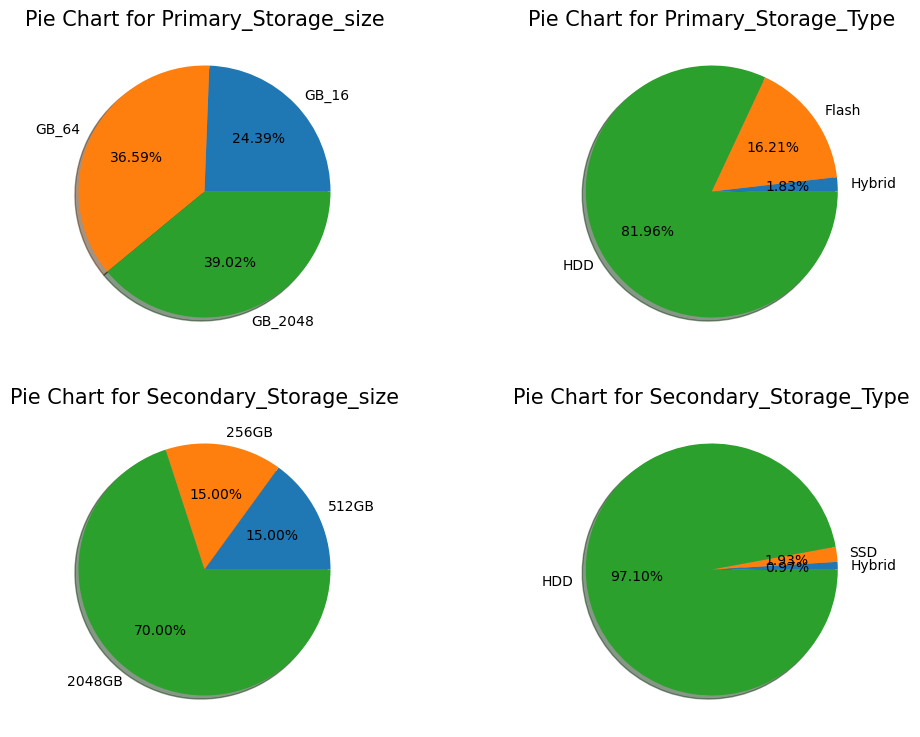

In [111]:
plt.figure(figsize=(12,9))
storage = ['Primary_Storage_size','Primary_Storage_Type','Secondary_Storage_size','Secondary_Storage_Type']
for i in range(0,len(storage)):
    plt.subplot(2,2,i+1)
    x = df[storage[i]].value_counts()[:-4:-1]
    plt.pie(x.values,labels=x.index,autopct='%.2f%%',shadow = True,data=[i])
    plt.title(f'Pie Chart for {storage[i]}',fontsize=15)

plt.show()

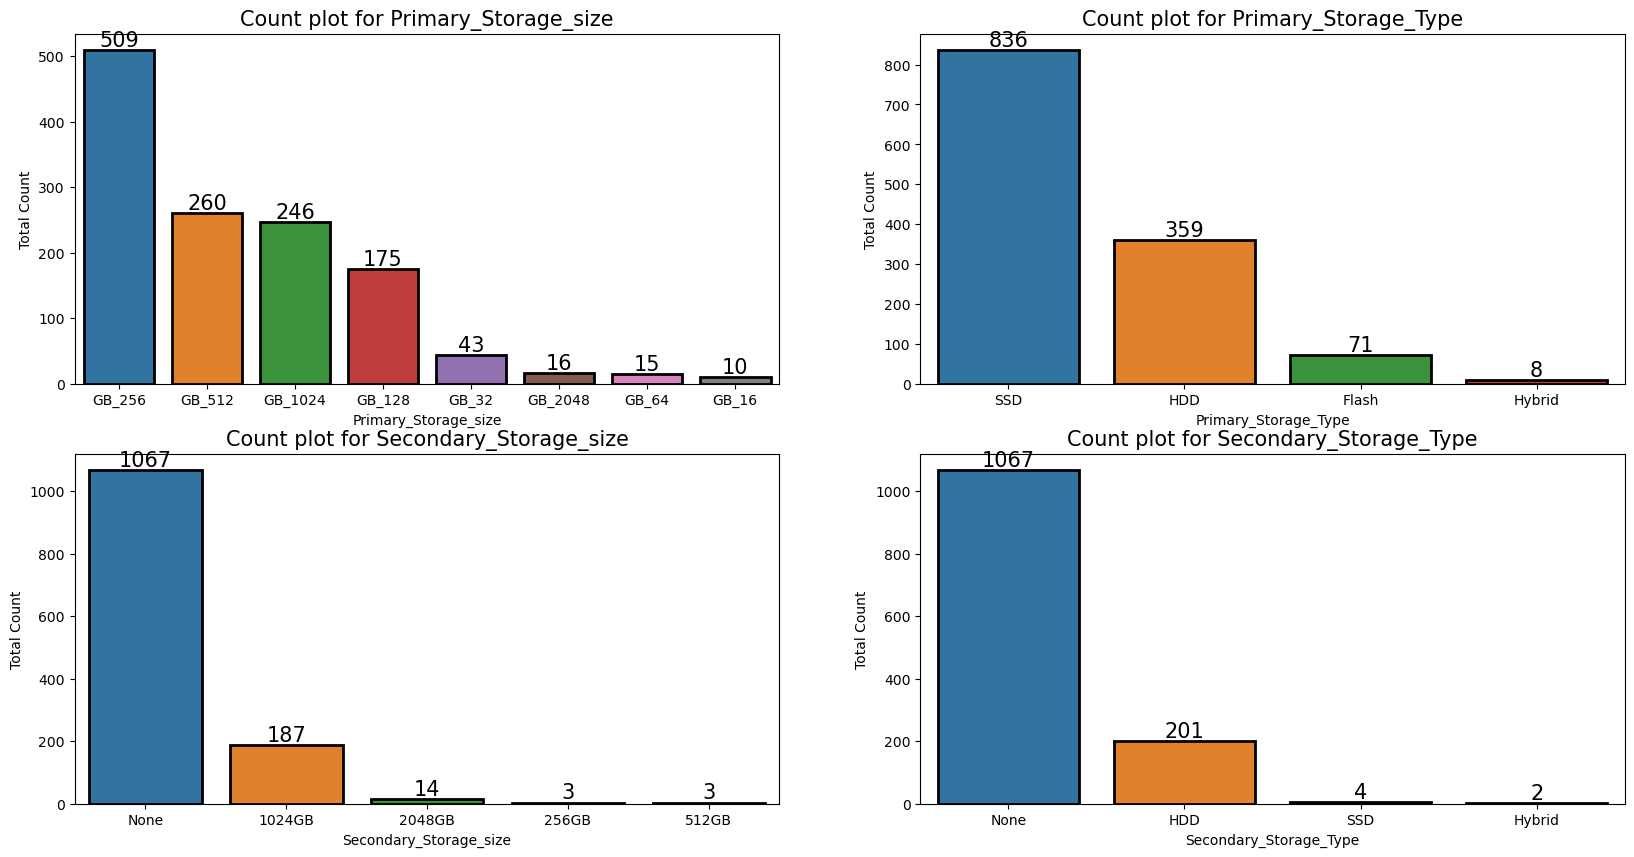

In [112]:
plt.figure(figsize=(20,10))
for i in range(0,len(storage)):
    plt.subplot(2,2,i+1)
    a = sns.countplot(x=df[storage[i]], order=df[storage[i]].value_counts().index,edgecolor = 'black', linewidth = 2)
    a.bar_label(a.containers[0], label_type= 'edge',fontsize=15,color='Black')
    plt.title(f'Count plot for {storage[i]}',fontsize=15)
    plt.ylabel("Total Count",fontsize=10)
    plt.xlabel(f"{storage[i]}",fontsize=10)
plt.show()

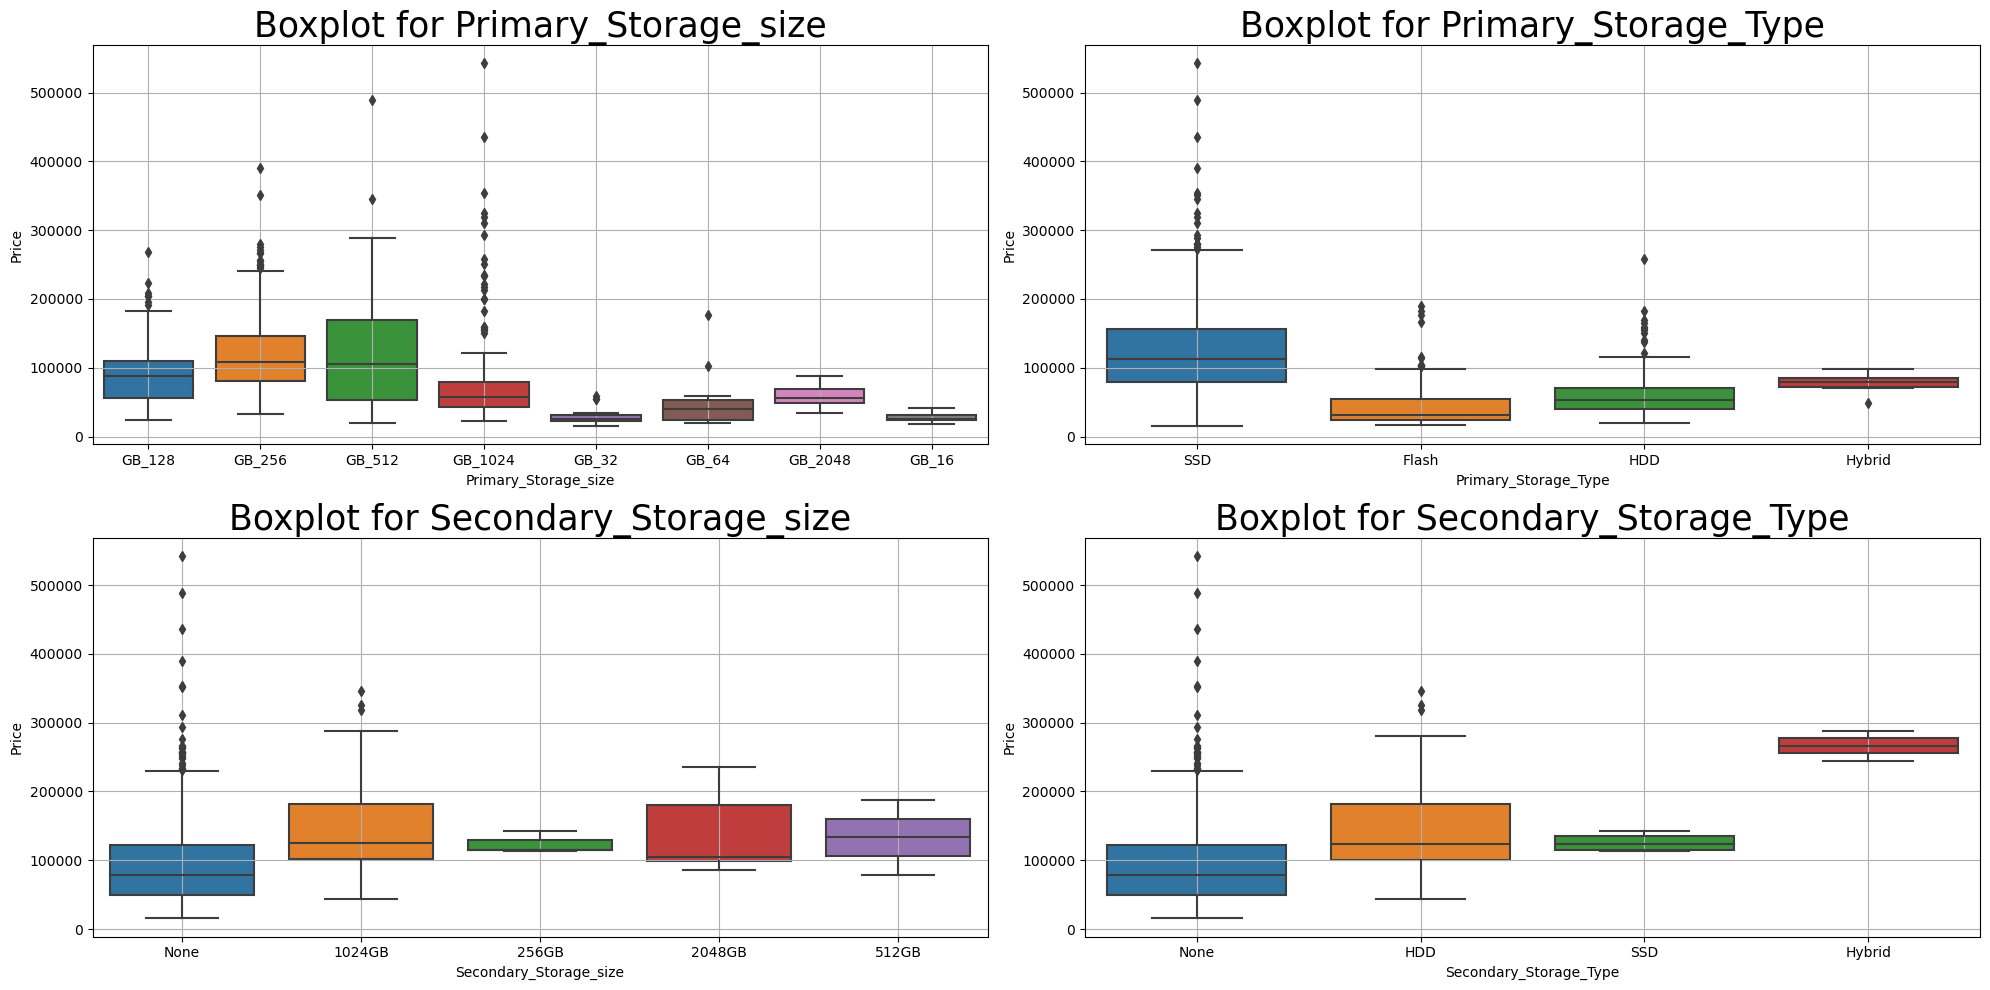

In [113]:

plt.figure(figsize=(20,10))
for i in range(0,len(storage)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[storage[i]],y=df['Price'])
    plt.title(f'Boxplot for {storage[i]}', fontsize=25)
    plt.grid()
plt.tight_layout()
plt.show()

df.drop('Storage',axis=1,inplace=True)

In [114]:
df.dtypes

Manufacturer                  object
Model_Name                    object
Category                      object
Screen Size                   object
Screen                        object
CPU                           object
RAM                           object
Storage                       object
GPU                           object
Operating_System              object
Operating_System_Version      object
Weight_KG                    float64
Price                        float64
CPU_Model                     object
GPU_Model                     object
CPU_speed_GHz                float64
CPU_speed_GHz_Bins          category
Weight_Bins                 category
Primary_Storage_size          object
Primary_Storage_Type          object
Secondary_Storage_size        object
Secondary_Storage_Type        object
dtype: object

In [115]:
def extract_screen(train):
    # Extract the resolution(1980x1028,...)
    train['resolution'] = train['Screen'].str.extract(r'(\d+x\d+)')
    # delete the resolution in the screen column to extract screen type
    train['screentype'] = train['Screen'].replace(r'(\d+x\d+)', '', regex = True)
    # Delete the string that denotes the Quality of the screen
    train['screentype'] = train['screentype'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','', regex = True)
    
    # Extract the column to show if the screen is a touchscreen or not
    train['touchscreen'] = train['screentype'].str.extract(r'(Touchscreen)')
    train['screentype'] = train['screentype'].replace(r'(Touchscreen)', '', regex = True)
    # If the screen is touchscreen, it is 1, else 0
    train['touchscreen'] = train['touchscreen'].replace('Touchscreen', 'Yes')
    train['touchscreen'] = train['touchscreen'].replace(np.nan, 'No')
    train['screentype'] = train['screentype'].replace(r' ','', regex = True)
    train['screentype'] = train['screentype'].replace(r'^\s*$', np.nan, regex = True)
    return train

In [116]:
df = extract_screen(df)
df.head(2)

,Manufacturer,Model_Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating_System,...,CPU_speed_GHz,CPU_speed_GHz_Bins,Weight_Bins,Primary_Storage_size,Primary_Storage_Type,Secondary_Storage_size,Secondary_Storage_Type,resolution,screentype,touchscreen
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,GB_8,128GB SSD,Intel Iris Plus Graphics 640,Mac_OS,...,2.3,ghz_2_to_2_49,kg_1_01_to_2,GB_128,SSD,None,None,2560x1600,IPSPanelRetinaDisplay,No
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,GB_8,128GB Flash Storage,Intel HD Graphics 6000,Mac_OS,...,1.8,ghz_1_50_to_1_99,kg_1_01_to_2,GB_128,Flash,None,None,1440x900,NaN,No


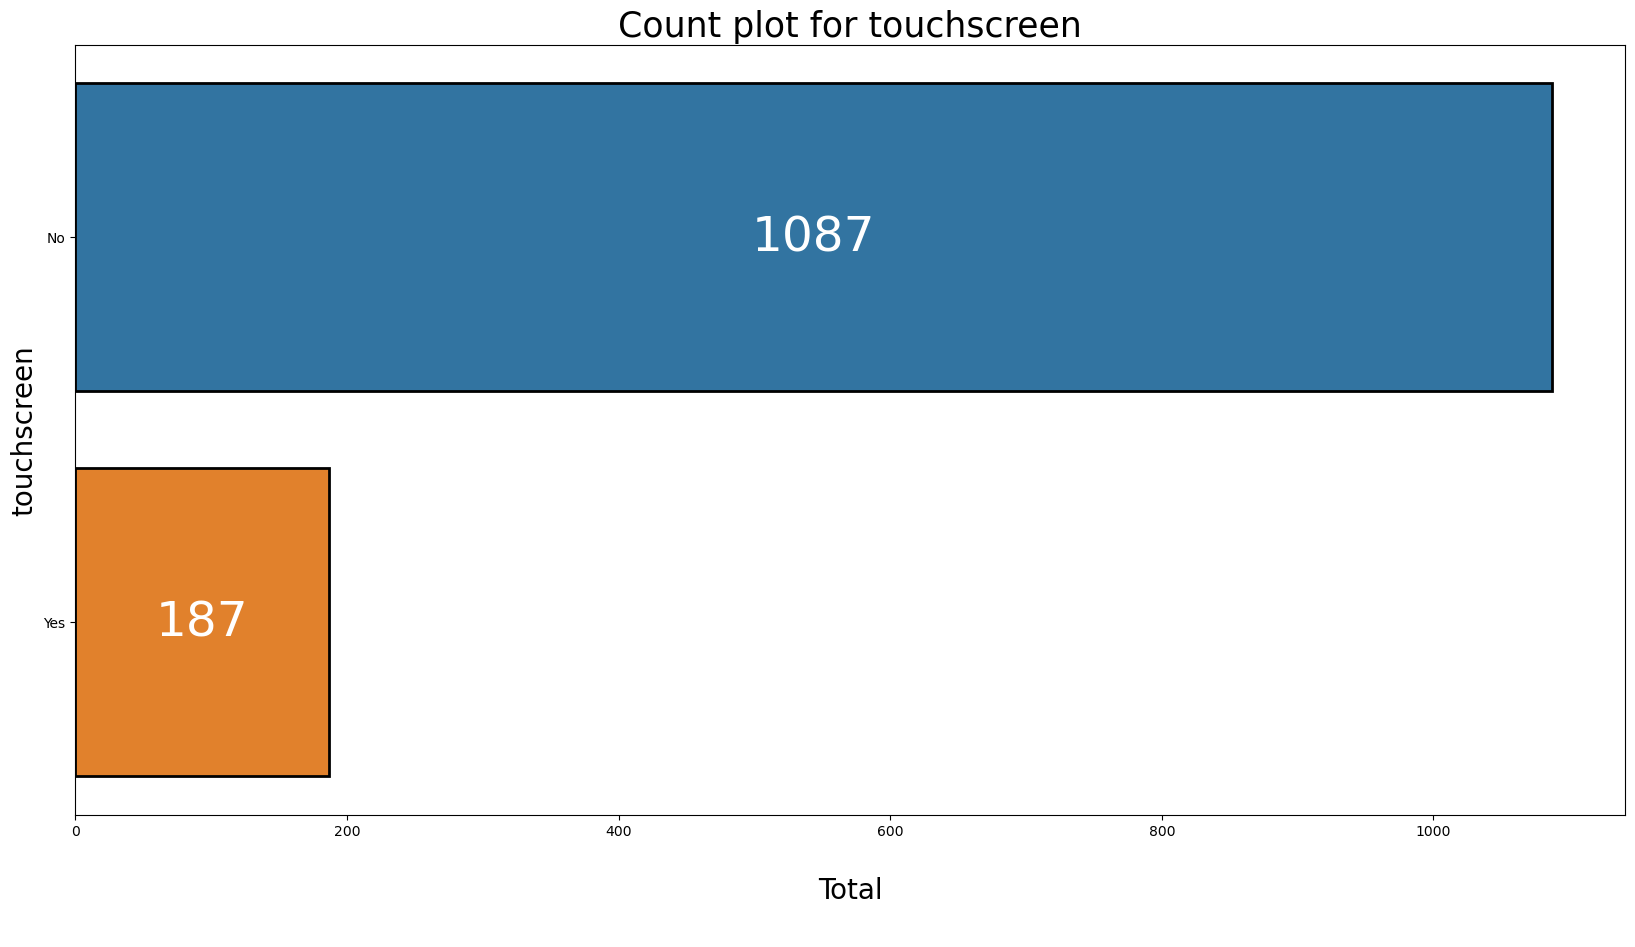

In [117]:
plt.figure(figsize=(20,10))
a = sns.countplot(y=df['touchscreen'], order=df['touchscreen'].value_counts().index,edgecolor = 'black', linewidth = 2)
a.bar_label(a.containers[0], label_type= 'center',fontsize=35,color='white')
plt.title(f'Count plot for touchscreen',fontsize=25)
plt.ylabel("touchscreen",fontsize=20)
plt.xlabel("\nTotal\n",fontsize=20)
plt.show()

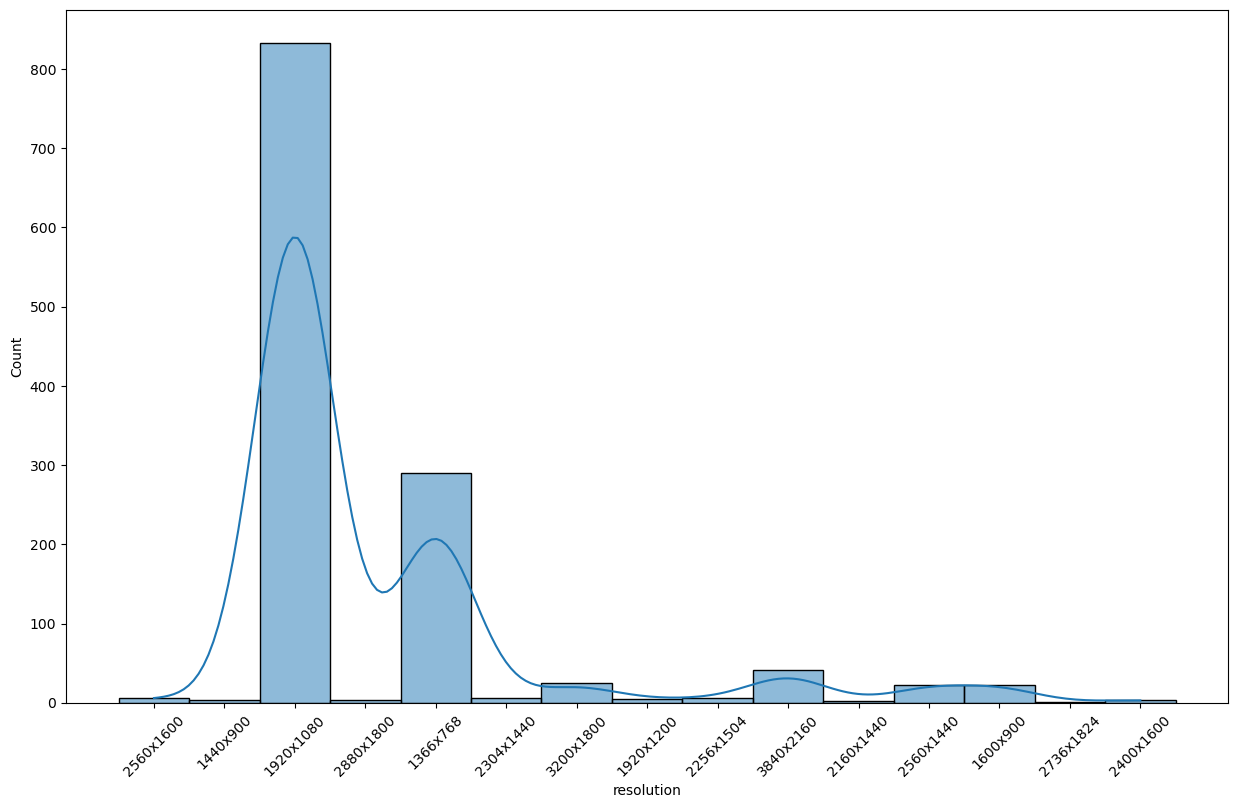

In [118]:
plt.subplots(figsize = (15,9))
sns.histplot(data = df, x = 'resolution', kde = True)
plt.xticks(rotation = 45)
plt.show()

In [119]:
import warnings
warnings.filterwarnings('ignore')

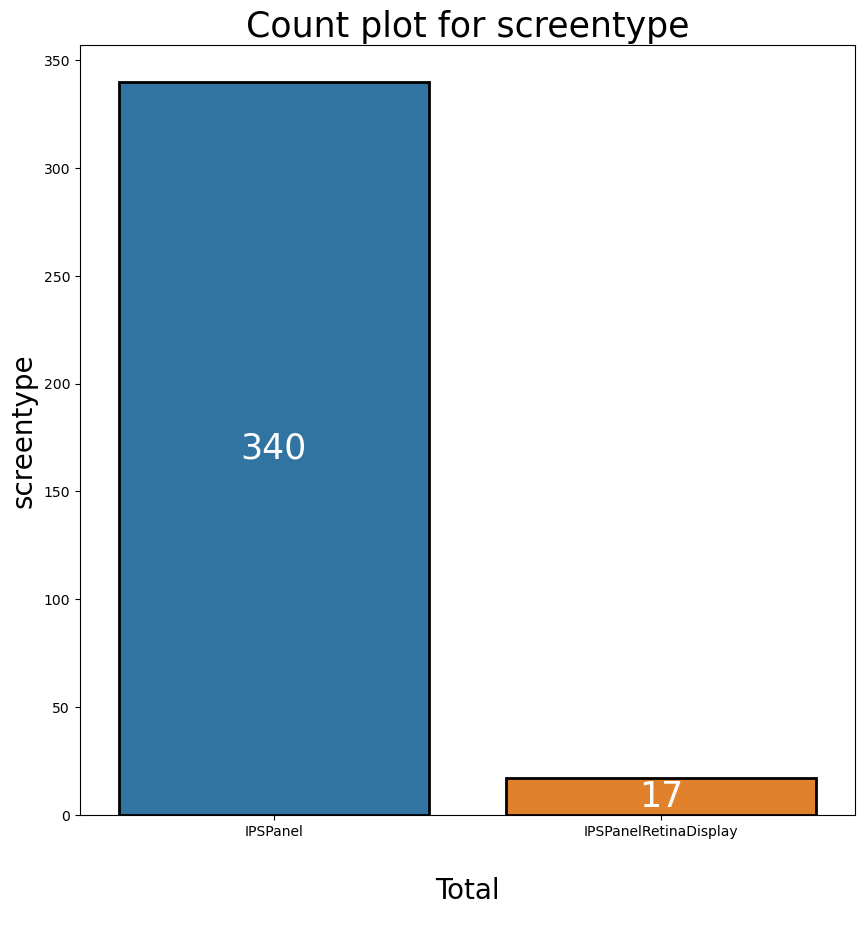

In [120]:
plt.figure(figsize=(10,10))
a = sns.countplot(x=df['screentype'], order=df['screentype'].value_counts().index,edgecolor = 'black', linewidth = 2)
a.bar_label(a.containers[0], label_type= 'center',fontsize=25,color='white')
plt.title(f'Count plot for screentype',fontsize=25)
plt.ylabel("screentype",fontsize=20)
plt.xlabel("\nTotal\n",fontsize=20)

plt.show()

### Screen Size

In [121]:
df.rename(columns = {'Screen Size':'Screen_size'},inplace=True)

In [122]:
df['Screen_size'].value_counts()

15.6"    646
14.0"    193
17.3"    164
13.3"    160
12.5"     39
11.6"     31
12.0"      6
13.5"      6
13.9"      6
12.3"      5
10.1"      4
15.4"      4
15.0"      4
13.0"      2
18.4"      1
17.0"      1
14.1"      1
11.3"      1
Name: Screen_size, dtype: int64

In [123]:
df['Screen_size'] = df['Screen_size'].str.replace('"', '')
df['Screen_size'] = df['Screen_size'].astype(np.float64)
df['Screen_size'].value_counts()

15.6    646
14.0    193
17.3    164
13.3    160
12.5     39
11.6     31
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Screen_size, dtype: int64

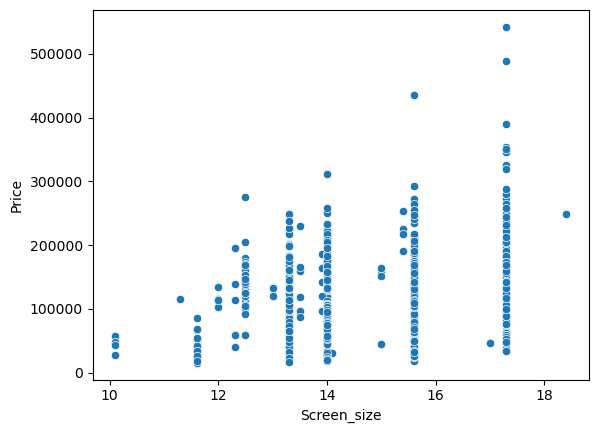

In [124]:
sns.scatterplot(x=df['Screen_size'],y=df['Price'])
plt.show()

In [125]:
BINS_scr = [10,12.99,13.99,14.99,15.99,19]
df['Screen_Size_Bins'] = pd.cut(df['Screen_size'],bins=BINS_scr, labels = ['scr_10_to_12_99','scr_13_to_13_99','scr_14_to_14_99',
               'scr_15_to_15_99','scr_16_and_above'])

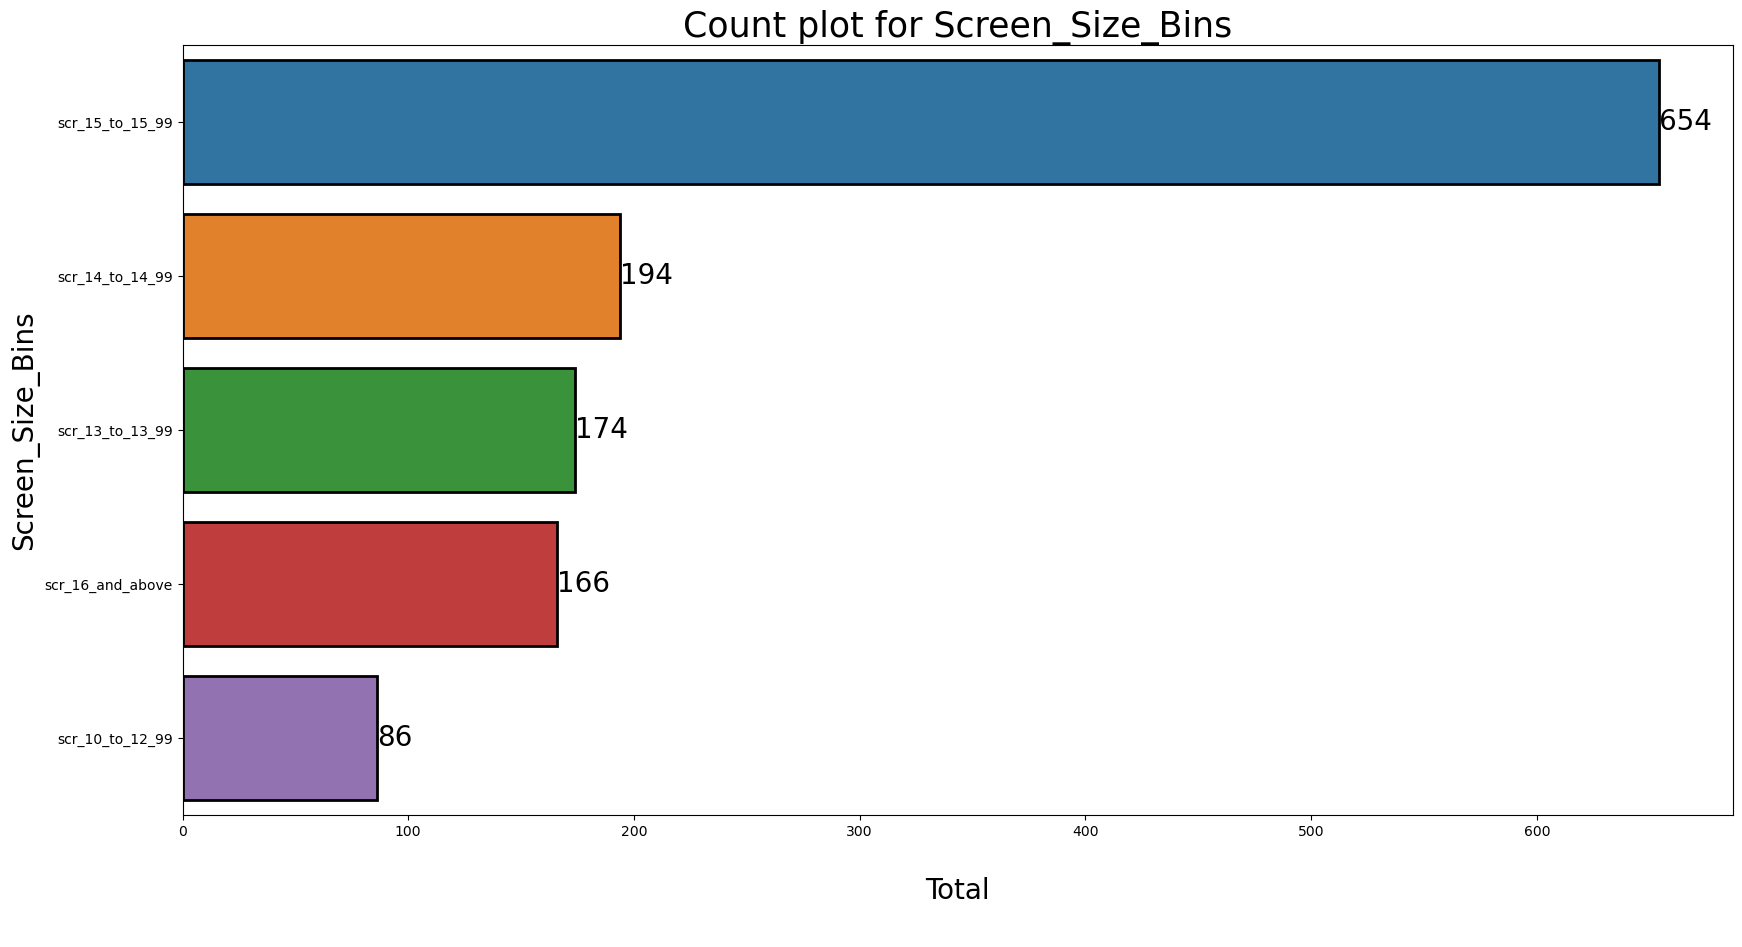

In [126]:
plt.figure(figsize=(20,10))
a = sns.countplot(y=df['Screen_Size_Bins'], order=df['Screen_Size_Bins'].value_counts().index,edgecolor = 'black', linewidth = 2)
a.bar_label(a.containers[0], label_type= 'edge',fontsize=20,color='black')
plt.title(f'Count plot for Screen_Size_Bins',fontsize=25)
plt.ylabel("Screen_Size_Bins",fontsize=20)
plt.xlabel("\nTotal\n",fontsize=20)
plt.show()

In [127]:
df.shape

(1274, 26)

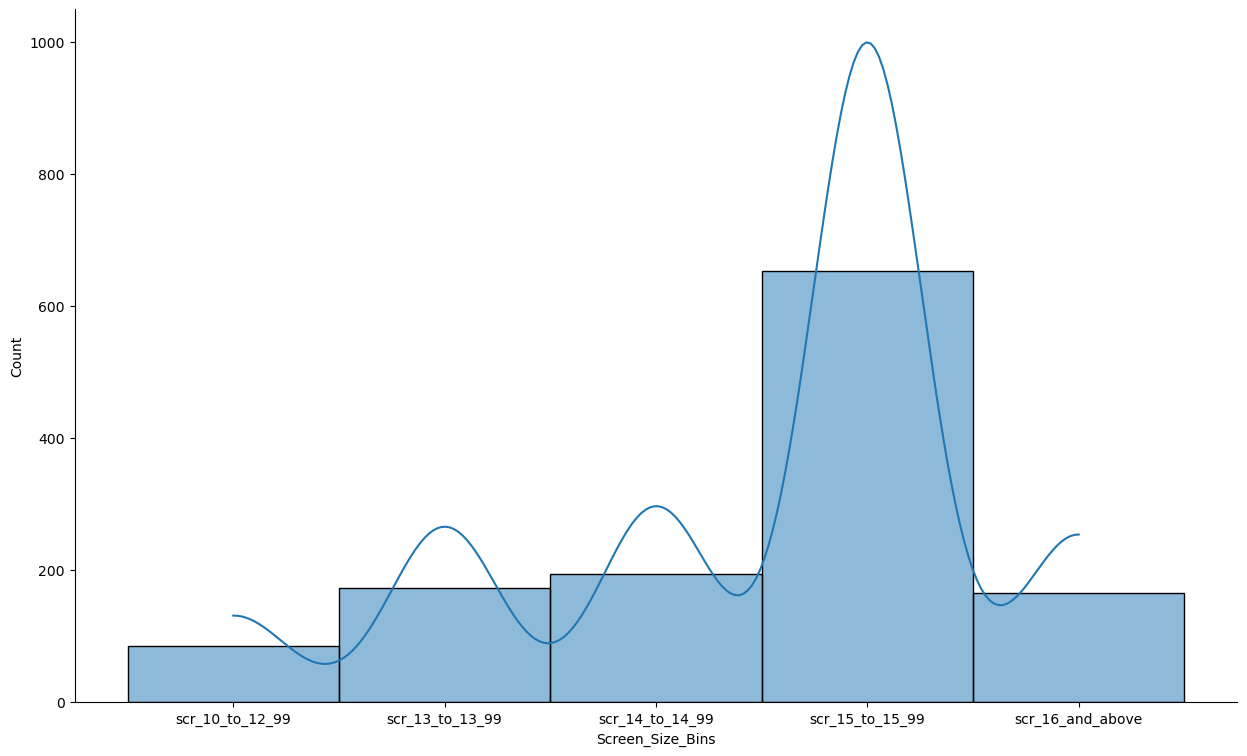

In [128]:
plt.subplots(figsize = (15,9))
sns.histplot(data = df, x = 'Screen_Size_Bins', kde = True)
plt.xticks(None)
sns.despine(right = True, top = True)
plt.show()

In [129]:
df.to_csv('Laptop_price.csv')

In [130]:
cat_columns = df.dtypes[df.dtypes=='object'].index

In [131]:
cat_columns

Index(['Manufacturer', 'Model_Name', 'Category', 'Screen', 'CPU', 'RAM',
       'Storage', 'GPU', 'Operating_System', 'Operating_System_Version',
       'CPU_Model', 'GPU_Model', 'Primary_Storage_size',
       'Primary_Storage_Type', 'Secondary_Storage_size',
       'Secondary_Storage_Type', 'resolution', 'screentype', 'touchscreen'],
      dtype='object')

In [132]:
num_columns = df.dtypes[df.dtypes!='object'].index

In [133]:
num_columns

Index(['Screen_size', 'Weight_KG', 'Price', 'CPU_speed_GHz',
       'CPU_speed_GHz_Bins', 'Weight_Bins', 'Screen_Size_Bins'],
      dtype='object')

In [134]:
df['Weight_Bins'] =df['Weight_Bins'].astype(str)
df['Screen_Size_Bins'] =df['Screen_Size_Bins'].astype(str)
df['CPU_speed_GHz_Bins'] =df['CPU_speed_GHz_Bins'].astype(str)

In [135]:
df.dtypes

Manufacturer                 object
Model_Name                   object
Category                     object
Screen_size                 float64
Screen                       object
CPU                          object
RAM                          object
Storage                      object
GPU                          object
Operating_System             object
Operating_System_Version     object
Weight_KG                   float64
Price                       float64
CPU_Model                    object
GPU_Model                    object
CPU_speed_GHz               float64
CPU_speed_GHz_Bins           object
Weight_Bins                  object
Primary_Storage_size         object
Primary_Storage_Type         object
Secondary_Storage_size       object
Secondary_Storage_Type       object
resolution                   object
screentype                   object
touchscreen                  object
Screen_Size_Bins             object
dtype: object

In [136]:
df2 = df.copy()

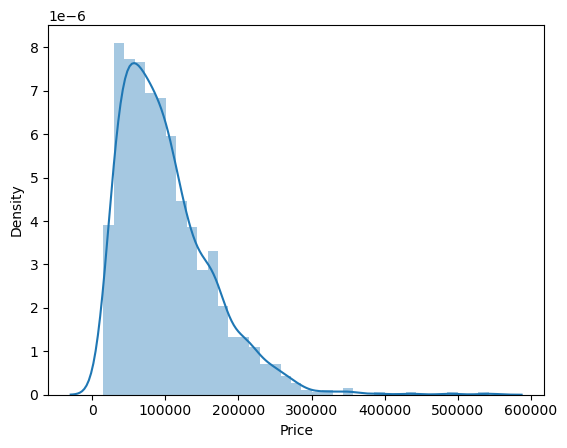

In [137]:
sns.distplot(df['Price'])
plt.show()

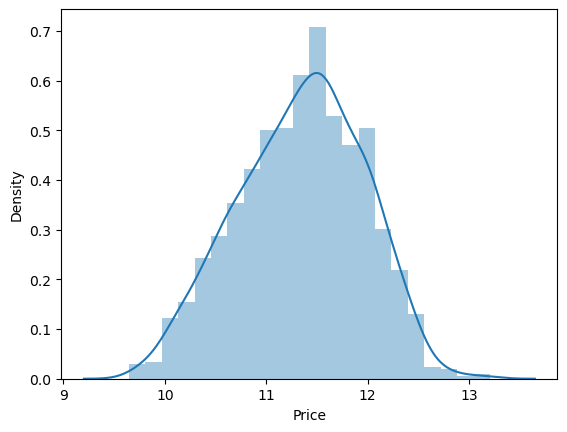

In [138]:
sns.distplot(np.log(df['Price']))
plt.show()

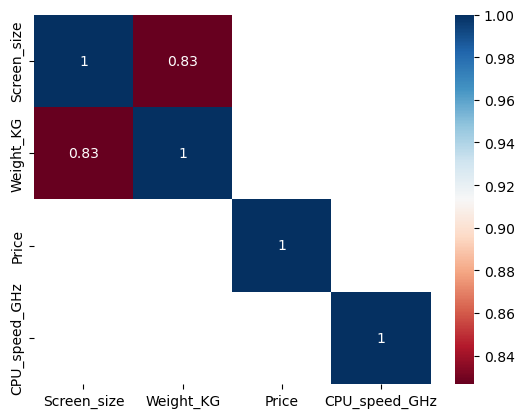

In [139]:
corr = df.corr()
sns.heatmap(abs(corr[corr>0.7]),annot=True,cmap='RdBu')
plt.show()

#### Inference

Weight and Screen Size are highly correlated by 0.83

In [140]:
df.describe(percentiles=(0.01,0.02,0.03,0.97,0.98,0.99)).T.iloc[:,3:]

,min,1%,2%,3%,50%,97%,98%,99%,max
Screen_size,10.10,11.600000,11.60,12.00000,15.60,17.3000,17.300000,17.300,18.40
Weight_KG,0.69,0.956500,1.08,1.10000,2.04,3.7800,4.300000,4.420,4.70
Price,15472.08,21640.700484,23563.80,25463.22012,87897.42,242375.4684,255872.617416,280129.122,542323.08
CPU_speed_GHz,0.90,1.100000,1.10,1.10000,2.50,2.9000,3.000000,3.000,3.60


In [141]:
for i in cat_columns:
    print('Feature',i)
    print(df[i].value_counts())
    print('*'*30)

Feature Manufacturer
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Manufacturer, dtype: int64
******************************
Feature Model_Name
XPS 13                                 30
Inspiron 3567                          25
250 G6                                 21
Vostro 3568                            19
Legion Y520-15IKBN                     19
                                       ..
VivoBook E201NA                         1
Ideapad 520-15IKBR                      1
Thinkpad X260                           1
Rog G752VL-UH71T                        1
X553SA-XX031T (N3050/4GB/500GB/W10)     1
Name: Model_Name, Length: 617, dtype: int64
******************************
Feature Category
Notebook           

In [142]:
df_copy = df.copy()

In [143]:
df_copy.to_csv("L_P_P.csv")

In [144]:
df.columns

Index(['Manufacturer', 'Model_Name', 'Category', 'Screen_size', 'Screen',
       'CPU', 'RAM', 'Storage', 'GPU', 'Operating_System',
       'Operating_System_Version', 'Weight_KG', 'Price', 'CPU_Model',
       'GPU_Model', 'CPU_speed_GHz', 'CPU_speed_GHz_Bins', 'Weight_Bins',
       'Primary_Storage_size', 'Primary_Storage_Type',
       'Secondary_Storage_size', 'Secondary_Storage_Type', 'resolution',
       'screentype', 'touchscreen', 'Screen_Size_Bins'],
      dtype='object')

In [145]:
for i in df:
    print('Feature',i)
    print(df[i].value_counts())
    print('*'*30)

Feature Manufacturer
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Manufacturer, dtype: int64
******************************
Feature Model_Name
XPS 13                                 30
Inspiron 3567                          25
250 G6                                 21
Vostro 3568                            19
Legion Y520-15IKBN                     19
                                       ..
VivoBook E201NA                         1
Ideapad 520-15IKBR                      1
Thinkpad X260                           1
Rog G752VL-UH71T                        1
X553SA-XX031T (N3050/4GB/500GB/W10)     1
Name: Model_Name, Length: 617, dtype: int64
******************************
Feature Category
Notebook           

In [146]:
# Screen_size

## Label Encoding

In [147]:
from sklearn.preprocessing import LabelEncoder

In [148]:
le_columns = ['Category','Screen_Size_Bins','RAM','Operating_System','Operating_System_Version','CPU_Model','GPU_Model','Primary_Storage_Type',
             'CPU_speed_GHz_Bins','Weight_Bins','Primary_Storage_size','touchscreen','Manufacturer','resolution']

In [149]:
le = LabelEncoder()

In [150]:
for i in le_columns:
    df[i] = le.fit_transform(df[i])

In [151]:
for i in df:
    print('Feature',i)
    print(df[i].value_counts())
    print('*'*30)

Feature Manufacturer
4     291
10    289
7     268
2     151
0     101
11     54
16     48
1      21
15      9
14      7
12      7
13      6
18      4
17      4
3       3
6       3
5       3
9       3
8       2
Name: Manufacturer, dtype: int64
******************************
Feature Model_Name
XPS 13                                 30
Inspiron 3567                          25
250 G6                                 21
Vostro 3568                            19
Legion Y520-15IKBN                     19
                                       ..
VivoBook E201NA                         1
Ideapad 520-15IKBR                      1
Thinkpad X260                           1
Rog G752VL-UH71T                        1
X553SA-XX031T (N3050/4GB/500GB/W10)     1
Name: Model_Name, Length: 617, dtype: int64
******************************
Feature Category
2    707
0    205
3    194
5    116
4     29
1     23
Name: Category, dtype: int64
******************************
Feature Screen_size
15.6    646
14.0  

df.drop('Model_Name','Screen','Storage','GPU','CPU','Weight_KG','Secondary_Storage_size','Secondary_Storage_Type','screentype')

In [152]:
df1 = df.copy()

In [153]:
df[df.dtypes[df.dtypes=='object'].index]

,Model_Name,Screen,CPU,Storage,GPU,Secondary_Storage_size,Secondary_Storage_Type,screentype
0,MacBook Pro,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,None,None,IPSPanelRetinaDisplay
1,Macbook Air,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,None,None,NaN
2,250 G6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,None,None,NaN
3,MacBook Pro,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,None,None,IPSPanelRetinaDisplay
4,MacBook Pro,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,None,None,IPSPanelRetinaDisplay
...,...,...,...,...,...,...,...,...
292,Yoga 500-14ISK,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,128GB SSD,Intel HD Graphics 520,None,None,IPSPanel
293,Yoga 900-13ISK,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,512GB SSD,Intel HD Graphics 520,None,None,IPSPanel
294,IdeaPad 100S-14IBR,1366x768,Intel Celeron Dual Core N3050 1.6GHz,64GB Flash Storage,Intel HD Graphics,None,None,NaN
295,15-AC110nv (i7-6500U/6GB/1TB/Radeon,1366x768,Intel Core i7 6500U 2.5GHz,1024GB HDD,AMD Radeon R5 M330,None,None,NaN


In [154]:
df.columns

Index(['Manufacturer', 'Model_Name', 'Category', 'Screen_size', 'Screen',
       'CPU', 'RAM', 'Storage', 'GPU', 'Operating_System',
       'Operating_System_Version', 'Weight_KG', 'Price', 'CPU_Model',
       'GPU_Model', 'CPU_speed_GHz', 'CPU_speed_GHz_Bins', 'Weight_Bins',
       'Primary_Storage_size', 'Primary_Storage_Type',
       'Secondary_Storage_size', 'Secondary_Storage_Type', 'resolution',
       'screentype', 'touchscreen', 'Screen_Size_Bins'],
      dtype='object')

In [155]:
x = df.drop(['Model_Name','Screen','Screen_size','Storage','GPU','CPU','CPU_speed_GHz','Secondary_Storage_size','Secondary_Storage_Type','screentype','Price','Weight_KG'],axis=1)
y = np.log(df['Price'])
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(1274, 14)
(1274,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [156]:
x.dtypes

Manufacturer                int32
Category                    int32
RAM                         int32
Operating_System            int32
Operating_System_Version    int32
CPU_Model                   int32
GPU_Model                   int32
CPU_speed_GHz_Bins          int32
Weight_Bins                 int32
Primary_Storage_size        int32
Primary_Storage_Type        int32
resolution                  int32
touchscreen                 int32
Screen_Size_Bins            int32
dtype: object

### OLS Model

In [157]:
import statsmodels.api as sm   # OLS

In [158]:
x1 = x.copy()
y1 = y.copy()
print(x1.shape)
print(y1.shape)

(1274, 14)
(1274,)


In [159]:
x1 = sm.add_constant(x1)
ols_model1 = sm.OLS(y1,x1).fit()
ols_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     125.0
Date:                Thu, 21 Dec 2023   Prob (F-statistic):          2.14e-226
Time:                        10:33:23   Log-Likelihood:                -642.56
No. Observations:                1274   AIC:                             1315.
Df Residuals:                    1259   BIC:                             1392.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        9.4203      0.110     85.722      0.000       9.205       9.636
Manufacturer                 0.0031      0.003      1.060      0.290      -0.003       0.009
Category                     0.0130      0.013      0.994      0.320      -0.013       0.039
RAM                         -0.0114      0.005     -2.460      0.014      -0.020      -0.002
Operating_System             0.1051      0.016      6.394      0.000       0.073       0.137
Operating_System_Version    -0.0699      0.029     -2.435      0.015      -0.126      -0.014
CPU_Model                    0.3711      0.065      5.753      0.000       0.245       0.498
GPU_Model                    0.0886      0.015      5.891      0.000       0.059       0.118
CPU_speed_GHz_Bins           0.0507      0.012      4.339      0.000       0.028       0.074
Weight_Bins                  0.1236      0.017      7.314      0.000       0.090       0.157
Primary_Storage_size         0.0223      0.006      3.933      0.000       0.011       0.033
Primary_Storage_Type         0.2471      0.012     19.995      0.000       0.223       0.271
resolution                   0.0641      0.004     15.131      0.000       0.056       0.072
touchscreen                  0.0257      0.045      0.570      0.569      -0.063       0.114
Screen_Size_Bins            -0.0091      0.013     -0.683      0.495      -0.035       0.017
==============================================================================
Omnibus:                        9.798   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.637
Skew:                          -0.124   Prob(JB):                      0.00297
Kurtosis:                       3.397   Cond. No.                         131.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Train,test split

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=24)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(891, 14)
(383, 14)
(891,)
(383,)


In [162]:
x.columns

Index(['Manufacturer', 'Category', 'RAM', 'Operating_System',
       'Operating_System_Version', 'CPU_Model', 'GPU_Model',
       'CPU_speed_GHz_Bins', 'Weight_Bins', 'Primary_Storage_size',
       'Primary_Storage_Type', 'resolution', 'touchscreen',
       'Screen_Size_Bins'],
      dtype='object')

In [163]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn import ensemble
import xgboost

In [164]:
from sklearn.metrics import *

In [165]:
def eval_model(ytest,y_pred):
    
    mae = mean_absolute_error(ytest,y_pred)
    mse = mean_squared_error(ytest,y_pred)
    rmse = mean_squared_error(ytest,y_pred,squared=False)
    return {'MAE':mae,'MSE':mse,'RMSE':rmse}

def model_res(model,x_train,x_test,y_train,y_test,y_pred,mname):
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    w = eval_model(y_test,y_pred)
    res_metrics = {'Train_R2':train_r2,'Test_R2':test_r2,'Test_MSE':w['MSE'],
                    'Test_RMSE':w['RMSE'],'Test_MAE':w['MAE']}
    res = pd.DataFrame(res_metrics, index=[mname]) 
    return res

### Linear Regression

In [166]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)
ypred_lr1 = (lr1.predict(x_test))

In [167]:
lr1_df = model_res(lr1,x_train,x_test,y_train,y_test,ypred_lr1,'Lin_Reg1')
lr1_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Lin_Reg1,0.561977,0.609003,0.164469,0.405548,0.316649


### Ridge Regression(L2 Regularization)

In [168]:
# Ridge
rid1 = Ridge(alpha=0.7)
rid1.fit(x_train,y_train)
ypred_rid1 = (rid1.predict(x_test))

In [169]:
rid1_df = model_res(rid1,x_train,x_test,y_train,y_test,ypred_rid1,'Ridge')
rid1_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Ridge,0.561971,0.608833,0.164541,0.405636,0.316807


In [170]:
lasso1 = Lasso(alpha=0.5)
lasso1.fit(x_train,y_train)
ypred_lasso1 = (lasso1.predict(x_test))

In [171]:
lasso1_df = model_res(rid1,x_train,x_test,y_train,y_test,ypred_rid1,'Lasso')
lasso1_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Lasso,0.561971,0.608833,0.164541,0.405636,0.316807


### Decision Tree Regressor

In [172]:
dt1 = DecisionTreeRegressor(max_depth=8,min_samples_split=10)
dt1.fit(x_train,y_train)
ypred_dt1 =(dt1.predict(x_test))

In [173]:
dt1_df = model_res(dt1,x_train,x_test,y_train,y_test,ypred_dt1,'DTree1')
dt1_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
DTree1,0.856284,0.748588,0.105754,0.325199,0.24338


### Random Forest Regressor

In [174]:
rf1 = RandomForestRegressor(n_estimators=100,max_depth=7,min_samples_split=10,
                            min_samples_leaf=15,random_state=1)
rf1.fit(x_train,y_train)
ypred_rf1  = (rf1.predict(x_test))

In [175]:
rf1_df = model_res(rf1,x_train,x_test,y_train,y_test,ypred_rf1,'RForest1')
rf1_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
RForest1,0.784697,0.754859,0.103116,0.321117,0.239267


### KNN

In [176]:
knn1 = KNeighborsRegressor(n_neighbors=7)
knn1.fit(x_train,y_train)
ypred_knn1  = knn1.predict(x_test)

In [177]:
knn1_res = model_res(knn1,x_train,x_test,y_train,y_test,ypred_knn1,'KNN')
knn1_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
KNN,0.819236,0.770015,0.096741,0.311033,0.234859


### AdaBoost Regressor

In [178]:
ada1 = AdaBoostRegressor(n_estimators=30)
ada1.fit(x_train,y_train)
ypred_ada1 = ada1.predict(x_test)

In [179]:
ada1_df = model_res(ada1,x_train,x_test,y_train,y_test,ypred_ada1,'AdaBoost_Reg')
ada1_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
AdaBoost_Reg,0.760335,0.757769,0.101892,0.319206,0.259171


### XGBoost Regressor

In [180]:
xgb = XGBRegressor(alpha=0.5,gamma=0.8,eta=0.3,max_depth=7)
xgb.fit(x_train,y_train)
ypred_xgb = (xgb.predict(x_test))

In [181]:
xgb_res = model_res(xgb,x_train,x_test,y_train,y_test,ypred_xgb,'XGboost_Reg')
xgb_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
XGboost_Reg,0.841185,0.802387,0.083124,0.288313,0.217813


In [182]:
all_res = pd.concat([lr1_df,rid1_df,knn1_res,dt1_df,rf1_df,ada1_df,xgb_res])
all_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Lin_Reg1,0.561977,0.609003,0.164469,0.405548,0.316649
Ridge,0.561971,0.608833,0.164541,0.405636,0.316807
KNN,0.819236,0.770015,0.096741,0.311033,0.234859
DTree1,0.856284,0.748588,0.105754,0.325199,0.243380
RForest1,0.784697,0.754859,0.103116,0.321117,0.239267
AdaBoost_Reg,0.760335,0.757769,0.101892,0.319206,0.259171
XGboost_Reg,0.841185,0.802387,0.083124,0.288313,0.217813


In [183]:
ypred_test = np.exp(xgb.predict(x_test))
ypred_test[:10]

array([ 96611.27 ,  61392.125, 139594.58 ,  45734.402,  34029.31 ,
        54717.652,  41536.027,  31499.803, 139594.58 , 141354.33 ],
      dtype=float32)

In [184]:
alpha = [0.1, 0.2, 0.3, 0.4, 0.5]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5]
eta = [0.1, 0.2, 0.3, 0.4, 0.5]
max_depth = list(range(5, 11))

min_mse = 9999999999999
alpha_val = 0
gamma_val = 0
eta_val = 0
max_depth_val = 0
c = 0

for i in alpha:
    for j in eta:  # Fix: Change from beta to eta
        for k in gamma:
            for l in max_depth:
                xgb_final_model = XGBRegressor(alpha=i, gamma=k, eta=j, max_depth=l)  # Fix: Use loop variables
                xgb_final_model.fit(x, y)
                
                predictions = xgb_final_model.predict(x)
                mse = mean_squared_error(y, predictions)

                c += 1
                print(f'For Iteration/Combination {c}, mse ={mse}, alpha = {i}, eta= {j}, gamma= {k}, max_depth ={l}')
                
                if mse <= min_mse:
                    min_mse = mse
                    alpha_val = i
                    gamma_val = j
                    eta_val = k
                    max_depth_val = l
                    

For Iteration/Combination 1, mse =0.03967332386725023, alpha = 0.1, eta= 0.1, gamma= 0.1, max_depth =5
For Iteration/Combination 2, mse =0.03619938238149627, alpha = 0.1, eta= 0.1, gamma= 0.1, max_depth =6
For Iteration/Combination 3, mse =0.034302264410962485, alpha = 0.1, eta= 0.1, gamma= 0.1, max_depth =7
For Iteration/Combination 4, mse =0.03284170998170766, alpha = 0.1, eta= 0.1, gamma= 0.1, max_depth =8
For Iteration/Combination 5, mse =0.031508193262582154, alpha = 0.1, eta= 0.1, gamma= 0.1, max_depth =9
For Iteration/Combination 6, mse =0.03129613726582984, alpha = 0.1, eta= 0.1, gamma= 0.1, max_depth =10
For Iteration/Combination 7, mse =0.043741646009978125, alpha = 0.1, eta= 0.1, gamma= 0.2, max_depth =5
For Iteration/Combination 8, mse =0.04102196580113566, alpha = 0.1, eta= 0.1, gamma= 0.2, max_depth =6
For Iteration/Combination 9, mse =0.03947322234367591, alpha = 0.1, eta= 0.1, gamma= 0.2, max_depth =7
For Iteration/Combination 10, mse =0.03820648820037776, alpha = 0.1, 

For Iteration/Combination 80, mse =0.0457508795895671, alpha = 0.1, eta= 0.3, gamma= 0.4, max_depth =6
For Iteration/Combination 81, mse =0.04578354661365889, alpha = 0.1, eta= 0.3, gamma= 0.4, max_depth =7
For Iteration/Combination 82, mse =0.04475182001952934, alpha = 0.1, eta= 0.3, gamma= 0.4, max_depth =8
For Iteration/Combination 83, mse =0.04509769593253975, alpha = 0.1, eta= 0.3, gamma= 0.4, max_depth =9
For Iteration/Combination 84, mse =0.04533183250817009, alpha = 0.1, eta= 0.3, gamma= 0.4, max_depth =10
For Iteration/Combination 85, mse =0.050434956993443476, alpha = 0.1, eta= 0.3, gamma= 0.5, max_depth =5
For Iteration/Combination 86, mse =0.04965612649590092, alpha = 0.1, eta= 0.3, gamma= 0.5, max_depth =6
For Iteration/Combination 87, mse =0.04808004654061356, alpha = 0.1, eta= 0.3, gamma= 0.5, max_depth =7
For Iteration/Combination 88, mse =0.04731285114917454, alpha = 0.1, eta= 0.3, gamma= 0.5, max_depth =8
For Iteration/Combination 89, mse =0.047212842184179905, alpha 

For Iteration/Combination 158, mse =0.041594834476055886, alpha = 0.2, eta= 0.1, gamma= 0.2, max_depth =6
For Iteration/Combination 159, mse =0.04022715293632059, alpha = 0.2, eta= 0.1, gamma= 0.2, max_depth =7
For Iteration/Combination 160, mse =0.03937831149994389, alpha = 0.2, eta= 0.1, gamma= 0.2, max_depth =8
For Iteration/Combination 161, mse =0.03894482045381794, alpha = 0.2, eta= 0.1, gamma= 0.2, max_depth =9
For Iteration/Combination 162, mse =0.038785770633052184, alpha = 0.2, eta= 0.1, gamma= 0.2, max_depth =10
For Iteration/Combination 163, mse =0.04589171282277162, alpha = 0.2, eta= 0.1, gamma= 0.3, max_depth =5
For Iteration/Combination 164, mse =0.045427422497136105, alpha = 0.2, eta= 0.1, gamma= 0.3, max_depth =6
For Iteration/Combination 165, mse =0.04452011204855474, alpha = 0.2, eta= 0.1, gamma= 0.3, max_depth =7
For Iteration/Combination 166, mse =0.043589970066685815, alpha = 0.2, eta= 0.1, gamma= 0.3, max_depth =8
For Iteration/Combination 167, mse =0.043237848697

For Iteration/Combination 237, mse =0.05009643206785523, alpha = 0.2, eta= 0.3, gamma= 0.5, max_depth =7
For Iteration/Combination 238, mse =0.04845815437084634, alpha = 0.2, eta= 0.3, gamma= 0.5, max_depth =8
For Iteration/Combination 239, mse =0.04847474887861899, alpha = 0.2, eta= 0.3, gamma= 0.5, max_depth =9
For Iteration/Combination 240, mse =0.04847474887861899, alpha = 0.2, eta= 0.3, gamma= 0.5, max_depth =10
For Iteration/Combination 241, mse =0.04100844032766921, alpha = 0.2, eta= 0.4, gamma= 0.1, max_depth =5
For Iteration/Combination 242, mse =0.037593334684821365, alpha = 0.2, eta= 0.4, gamma= 0.1, max_depth =6
For Iteration/Combination 243, mse =0.03557080174250883, alpha = 0.2, eta= 0.4, gamma= 0.1, max_depth =7
For Iteration/Combination 244, mse =0.03374972104276658, alpha = 0.2, eta= 0.4, gamma= 0.1, max_depth =8
For Iteration/Combination 245, mse =0.033276780965296654, alpha = 0.2, eta= 0.4, gamma= 0.1, max_depth =9
For Iteration/Combination 246, mse =0.03202688358686

For Iteration/Combination 316, mse =0.04432578273486218, alpha = 0.3, eta= 0.1, gamma= 0.3, max_depth =8
For Iteration/Combination 317, mse =0.04397533481020125, alpha = 0.3, eta= 0.1, gamma= 0.3, max_depth =9
For Iteration/Combination 318, mse =0.04459213942948112, alpha = 0.3, eta= 0.1, gamma= 0.3, max_depth =10
For Iteration/Combination 319, mse =0.050324362719741486, alpha = 0.3, eta= 0.1, gamma= 0.4, max_depth =5
For Iteration/Combination 320, mse =0.04855804843540339, alpha = 0.3, eta= 0.1, gamma= 0.4, max_depth =6
For Iteration/Combination 321, mse =0.04813880959977301, alpha = 0.3, eta= 0.1, gamma= 0.4, max_depth =7
For Iteration/Combination 322, mse =0.047672855511894804, alpha = 0.3, eta= 0.1, gamma= 0.4, max_depth =8
For Iteration/Combination 323, mse =0.04773839595197043, alpha = 0.3, eta= 0.1, gamma= 0.4, max_depth =9
For Iteration/Combination 324, mse =0.04765882825975341, alpha = 0.3, eta= 0.1, gamma= 0.4, max_depth =10
For Iteration/Combination 325, mse =0.0518064463155

For Iteration/Combination 396, mse =0.033845920622108394, alpha = 0.3, eta= 0.4, gamma= 0.1, max_depth =10
For Iteration/Combination 397, mse =0.04434676254330289, alpha = 0.3, eta= 0.4, gamma= 0.2, max_depth =5
For Iteration/Combination 398, mse =0.041017191551598886, alpha = 0.3, eta= 0.4, gamma= 0.2, max_depth =6
For Iteration/Combination 399, mse =0.04118971698502283, alpha = 0.3, eta= 0.4, gamma= 0.2, max_depth =7
For Iteration/Combination 400, mse =0.04039983907160179, alpha = 0.3, eta= 0.4, gamma= 0.2, max_depth =8
For Iteration/Combination 401, mse =0.04026349124843701, alpha = 0.3, eta= 0.4, gamma= 0.2, max_depth =9
For Iteration/Combination 402, mse =0.03983058929823371, alpha = 0.3, eta= 0.4, gamma= 0.2, max_depth =10
For Iteration/Combination 403, mse =0.04694639925372849, alpha = 0.3, eta= 0.4, gamma= 0.3, max_depth =5
For Iteration/Combination 404, mse =0.0464207634174314, alpha = 0.3, eta= 0.4, gamma= 0.3, max_depth =6
For Iteration/Combination 405, mse =0.04363405885083

For Iteration/Combination 476, mse =0.051882840304416616, alpha = 0.4, eta= 0.1, gamma= 0.5, max_depth =6
For Iteration/Combination 477, mse =0.05168740811327168, alpha = 0.4, eta= 0.1, gamma= 0.5, max_depth =7
For Iteration/Combination 478, mse =0.05070026917502717, alpha = 0.4, eta= 0.1, gamma= 0.5, max_depth =8
For Iteration/Combination 479, mse =0.0509800104584573, alpha = 0.4, eta= 0.1, gamma= 0.5, max_depth =9
For Iteration/Combination 480, mse =0.05026369013799699, alpha = 0.4, eta= 0.1, gamma= 0.5, max_depth =10
For Iteration/Combination 481, mse =0.04206650848511991, alpha = 0.4, eta= 0.2, gamma= 0.1, max_depth =5
For Iteration/Combination 482, mse =0.03858855143563236, alpha = 0.4, eta= 0.2, gamma= 0.1, max_depth =6
For Iteration/Combination 483, mse =0.036780589500973085, alpha = 0.4, eta= 0.2, gamma= 0.1, max_depth =7
For Iteration/Combination 484, mse =0.03632080774906848, alpha = 0.4, eta= 0.2, gamma= 0.1, max_depth =8
For Iteration/Combination 485, mse =0.034741315602351

For Iteration/Combination 554, mse =0.045498174862128475, alpha = 0.4, eta= 0.4, gamma= 0.3, max_depth =6
For Iteration/Combination 555, mse =0.04575789046657188, alpha = 0.4, eta= 0.4, gamma= 0.3, max_depth =7
For Iteration/Combination 556, mse =0.04614982872191829, alpha = 0.4, eta= 0.4, gamma= 0.3, max_depth =8
For Iteration/Combination 557, mse =0.04399522416494472, alpha = 0.4, eta= 0.4, gamma= 0.3, max_depth =9
For Iteration/Combination 558, mse =0.04391570458095464, alpha = 0.4, eta= 0.4, gamma= 0.3, max_depth =10
For Iteration/Combination 559, mse =0.04847034177261203, alpha = 0.4, eta= 0.4, gamma= 0.4, max_depth =5
For Iteration/Combination 560, mse =0.048630999126996116, alpha = 0.4, eta= 0.4, gamma= 0.4, max_depth =6
For Iteration/Combination 561, mse =0.04819481428906144, alpha = 0.4, eta= 0.4, gamma= 0.4, max_depth =7
For Iteration/Combination 562, mse =0.04712866411949861, alpha = 0.4, eta= 0.4, gamma= 0.4, max_depth =8
For Iteration/Combination 563, mse =0.04738065713835

For Iteration/Combination 632, mse =0.040761290639904836, alpha = 0.5, eta= 0.2, gamma= 0.1, max_depth =6
For Iteration/Combination 633, mse =0.03846683803940453, alpha = 0.5, eta= 0.2, gamma= 0.1, max_depth =7
For Iteration/Combination 634, mse =0.037256627789161605, alpha = 0.5, eta= 0.2, gamma= 0.1, max_depth =8
For Iteration/Combination 635, mse =0.03535552950262946, alpha = 0.5, eta= 0.2, gamma= 0.1, max_depth =9
For Iteration/Combination 636, mse =0.035468649366816166, alpha = 0.5, eta= 0.2, gamma= 0.1, max_depth =10
For Iteration/Combination 637, mse =0.04513528983583822, alpha = 0.5, eta= 0.2, gamma= 0.2, max_depth =5
For Iteration/Combination 638, mse =0.044317779524656355, alpha = 0.5, eta= 0.2, gamma= 0.2, max_depth =6
For Iteration/Combination 639, mse =0.04305685886245069, alpha = 0.5, eta= 0.2, gamma= 0.2, max_depth =7
For Iteration/Combination 640, mse =0.04227634175564106, alpha = 0.5, eta= 0.2, gamma= 0.2, max_depth =8
For Iteration/Combination 641, mse =0.041813024564

For Iteration/Combination 712, mse =0.048849519230669866, alpha = 0.5, eta= 0.4, gamma= 0.4, max_depth =8
For Iteration/Combination 713, mse =0.046966255536764125, alpha = 0.5, eta= 0.4, gamma= 0.4, max_depth =9
For Iteration/Combination 714, mse =0.04781778933421057, alpha = 0.5, eta= 0.4, gamma= 0.4, max_depth =10
For Iteration/Combination 715, mse =0.05176998551569659, alpha = 0.5, eta= 0.4, gamma= 0.5, max_depth =5
For Iteration/Combination 716, mse =0.051318070456038534, alpha = 0.5, eta= 0.4, gamma= 0.5, max_depth =6
For Iteration/Combination 717, mse =0.050214943139932675, alpha = 0.5, eta= 0.4, gamma= 0.5, max_depth =7
For Iteration/Combination 718, mse =0.05088592499792, alpha = 0.5, eta= 0.4, gamma= 0.5, max_depth =8
For Iteration/Combination 719, mse =0.049569910265224046, alpha = 0.5, eta= 0.4, gamma= 0.5, max_depth =9
For Iteration/Combination 720, mse =0.05067177123337469, alpha = 0.5, eta= 0.4, gamma= 0.5, max_depth =10
For Iteration/Combination 721, mse =0.0425394039725

In [185]:
print('min_mse',min_mse)
print('alpha_val',alpha_val)
print('gamma_val',gamma_val)
print('eta_val',eta_val)
print('max_depth' , max_depth_val)

min_mse 0.030389957071765148
alpha_val 0.1
gamma_val 0.5
eta_val 0.1
max_depth 10


In [193]:
xgb1 = XGBRegressor(alpha=alpha_val,gamma=gamma_val,eta=eta_val,max_depth=max_depth_val)
xgb1.fit(x_train,y_train)
ypred_xgb1 = (xgb1.predict(x_test))

In [194]:
xgb1_res = model_res(xgb1,x_train,x_test,y_train,y_test,ypred_xgb1,'XGboost_Reg1')
xgb1_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
XGboost_Reg1,0.863307,0.812689,0.078791,0.280697,0.211405


In [195]:
all_res = pd.concat([lr1_df,rid1_df,knn1_res,dt1_df,rf1_df,ada1_df,xgb_res,xgb1_res])
all_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Lin_Reg1,0.561977,0.609003,0.164469,0.405548,0.316649
Ridge,0.561971,0.608833,0.164541,0.405636,0.316807
KNN,0.819236,0.770015,0.096741,0.311033,0.234859
DTree1,0.856284,0.748588,0.105754,0.325199,0.243380
RForest1,0.784697,0.754859,0.103116,0.321117,0.239267
AdaBoost_Reg,0.760335,0.757769,0.101892,0.319206,0.259171
XGboost_Reg,0.841185,0.802387,0.083124,0.288313,0.217813
XGboost_Reg1,0.863307,0.812689,0.078791,0.280697,0.211405


In [191]:
import pickle

In [189]:
# Saving xgb Model
pickle.dump(xgb, open('Laptop_xgb.pkl','wb')) 

In [192]:
# Saving xgb1_res Model
pickle.dump(xgb1, open('Laptop_xgb1.pkl','wb')) 